# Development notebook. No experiments or results here. For dev purposes




In [1]:
run init.ipynb

Done.


# Dev missingness patterns

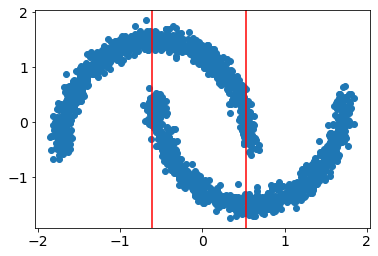

In [80]:
experiment.dataset.X_gt[(experiment.dataset.y_gt==1).squeeze()].mean(axis=0)

plt.scatter(experiment.dataset.X_gt[:,0], experiment.dataset.X_gt[:,1])
plt.axvline(experiment.dataset.X_gt[(experiment.dataset.y_gt==1).squeeze()].mean(axis=0)[0], color='r')
plt.axvline(experiment.dataset.X_gt[(experiment.dataset.y_gt==0).squeeze()].mean(axis=0)[0], color='r')

## Missing Completely at Random (MCAR)

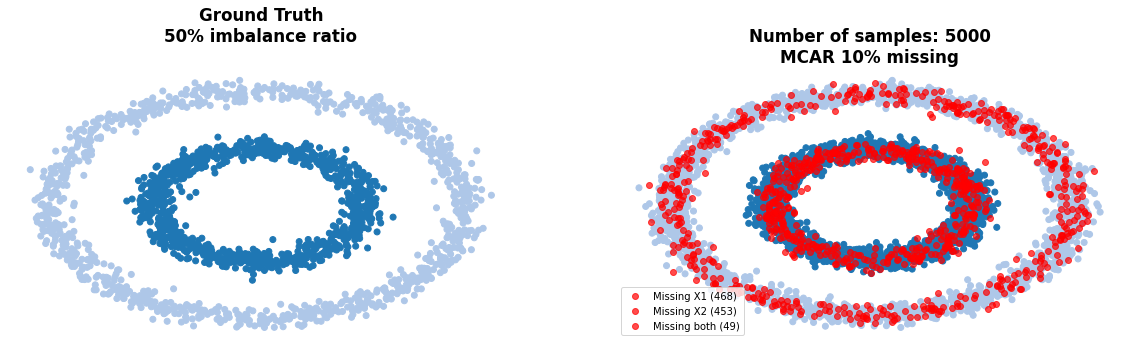

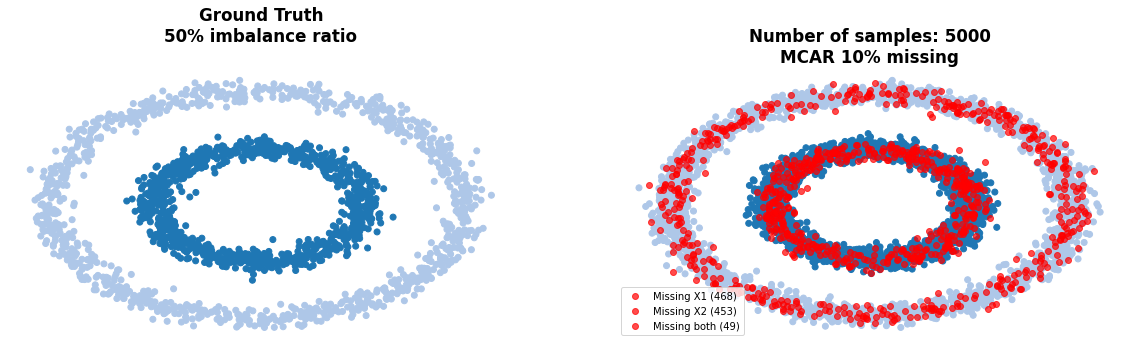

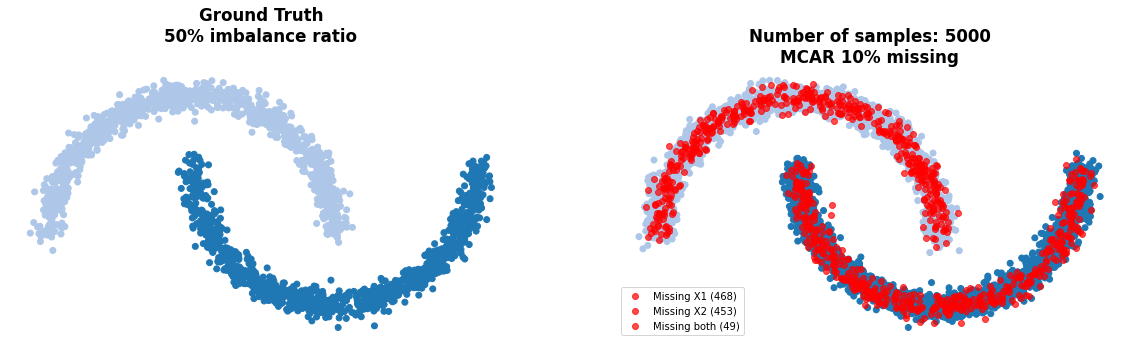

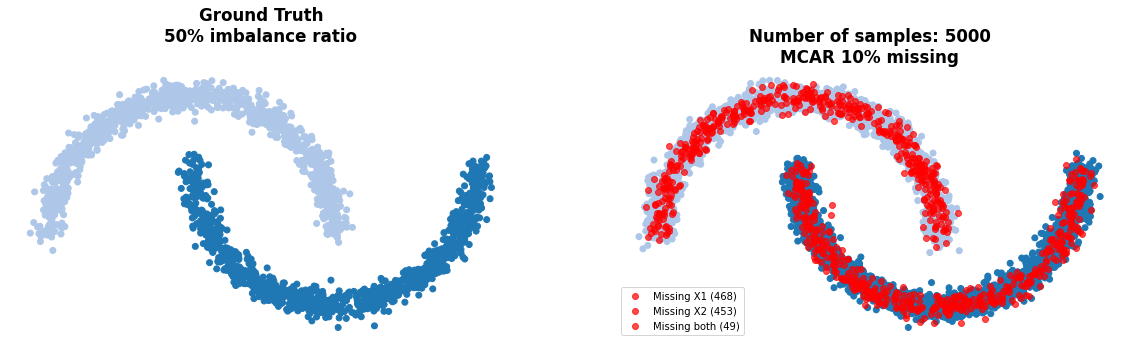

In [12]:
from generateToyDataset import DatasetGenerator

dataset = DatasetGenerator(name='circles', num_samples=5000, ratio_of_missing_values=.1, imbalance_ratio=.5, num_samples_gt=2000, verbosity=1, random_state=47)
dataset.generate_missing_coordinates(missingness_mechanism='MCAR', allow_missing_both_coordinates=False, missing_first_quarter=True, ratio_missing_per_class=[.1, .2])
dataset.plot(verbosity=1)

dataset = DatasetGenerator(name='moons', num_samples=5000, ratio_of_missing_values=.1, imbalance_ratio=.5, num_samples_gt=2000, verbosity=1, random_state=47)
dataset.generate_missing_coordinates(missingness_mechanism='MCAR', allow_missing_both_coordinates=False, missing_first_quarter=True, ratio_missing_per_class=[.1, .2])
dataset.plot(verbosity=1)

## Missing at Random (MAR)

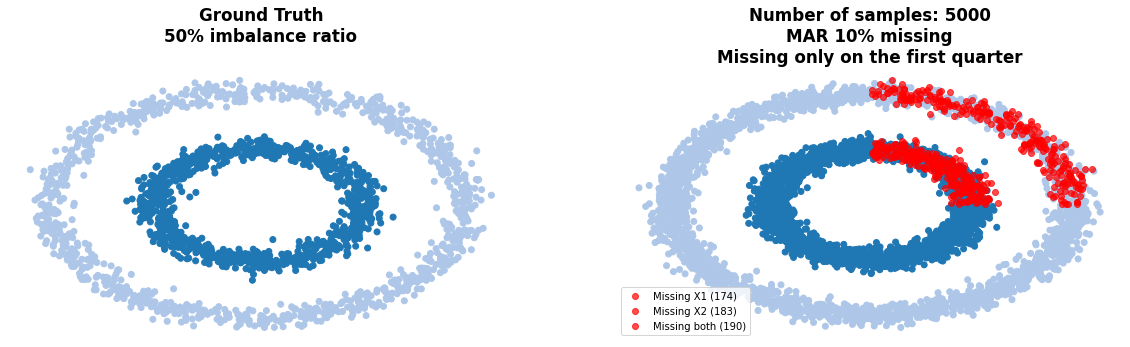

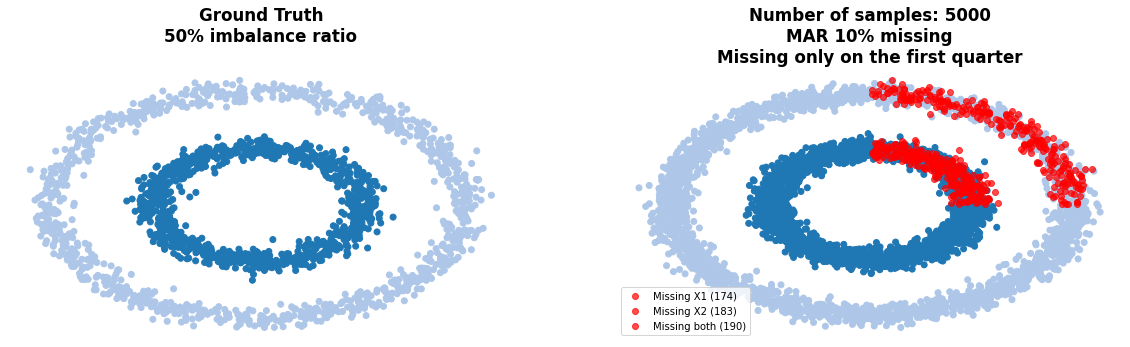

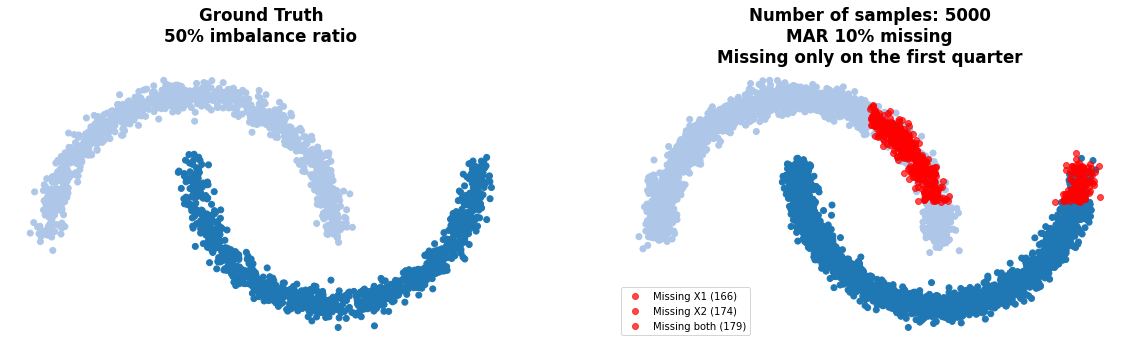

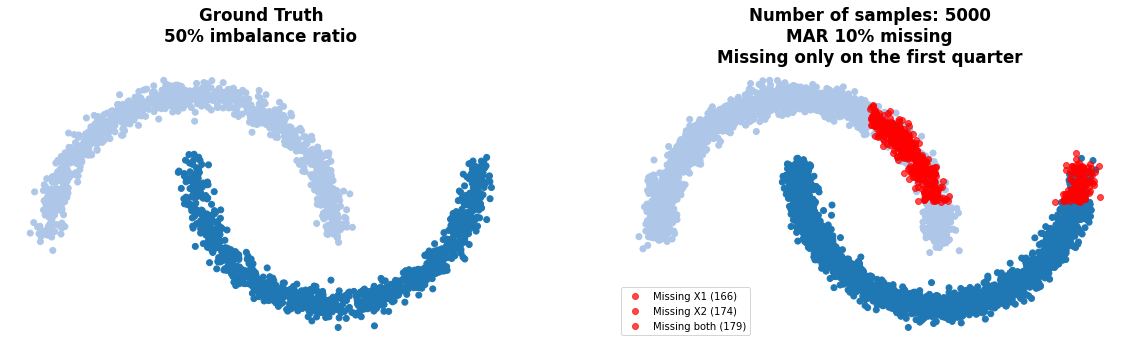

In [5]:
from generateToyDataset import DatasetGenerator

dataset = DatasetGenerator(name='circles', num_samples=5000, ratio_of_missing_values=.1, imbalance_ratio=.5, num_samples_gt=2000, verbosity=1, random_state=47)
dataset.generate_missing_coordinates(missingness_mechanism='MAR', allow_missing_both_coordinates=False, missing_first_quarter=True, ratio_missing_per_class=[.1, .2])
dataset.plot(verbosity=1)

dataset = DatasetGenerator(name='moons', num_samples=5000, ratio_of_missing_values=.1, imbalance_ratio=.5, num_samples_gt=2000, verbosity=1, random_state=47)
dataset.generate_missing_coordinates(missingness_mechanism='MAR', allow_missing_both_coordinates=False, missing_first_quarter=True, ratio_missing_per_class=[.1, .2])
dataset.plot(verbosity=1)

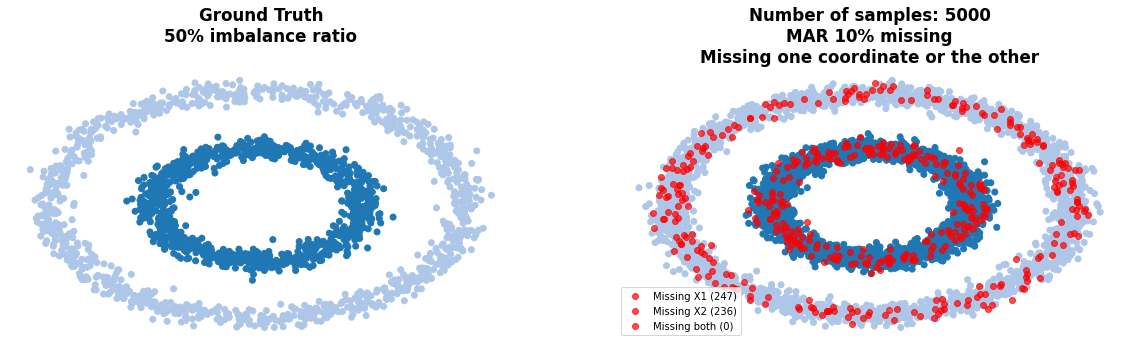

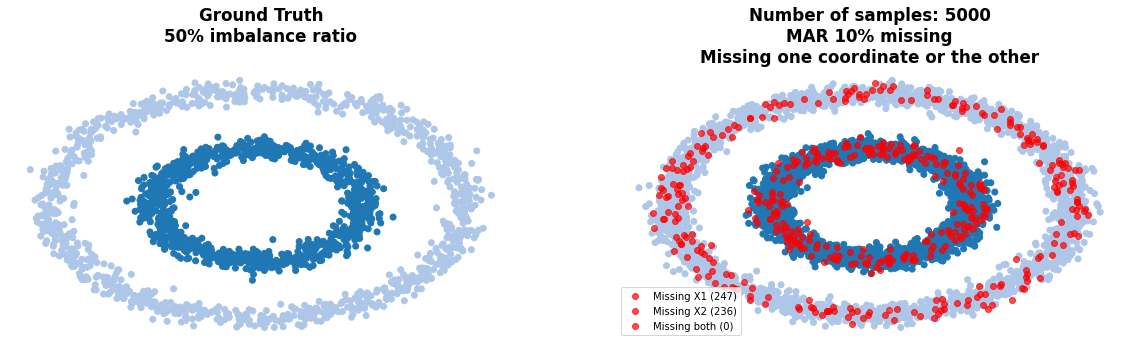

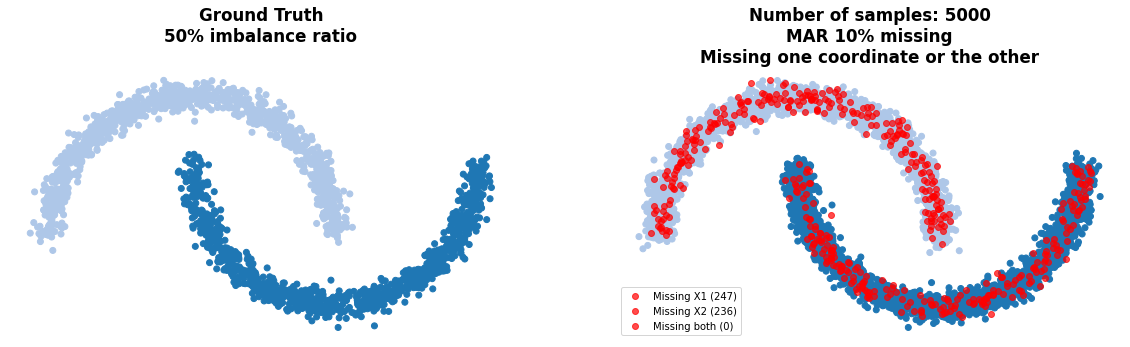

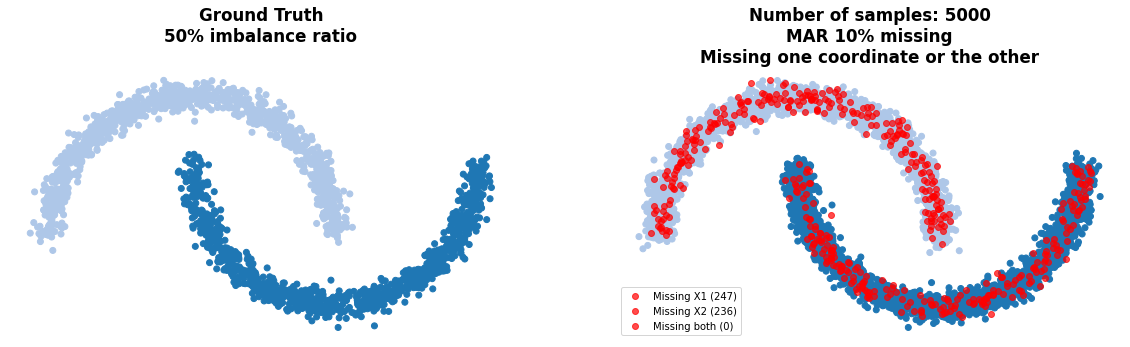

In [6]:
from generateToyDataset import DatasetGenerator

dataset = DatasetGenerator(name='circles', num_samples=5000, ratio_of_missing_values=.1, imbalance_ratio=.5, num_samples_gt=2000, verbosity=1, random_state=47)
dataset.generate_missing_coordinates(missingness_mechanism='MAR', allow_missing_both_coordinates=True, missing_first_quarter=False, ratio_missing_per_class=[.1, .2])
dataset.plot(verbosity=1)

dataset = DatasetGenerator(name='moons', num_samples=5000, ratio_of_missing_values=.1, imbalance_ratio=.5, num_samples_gt=2000, verbosity=1, random_state=47)
dataset.generate_missing_coordinates(missingness_mechanism='MAR', allow_missing_both_coordinates=True, missing_first_quarter=False, ratio_missing_per_class=[.1, .2])
dataset.plot(verbosity=1)

## Missing Not at Random (MNAR)

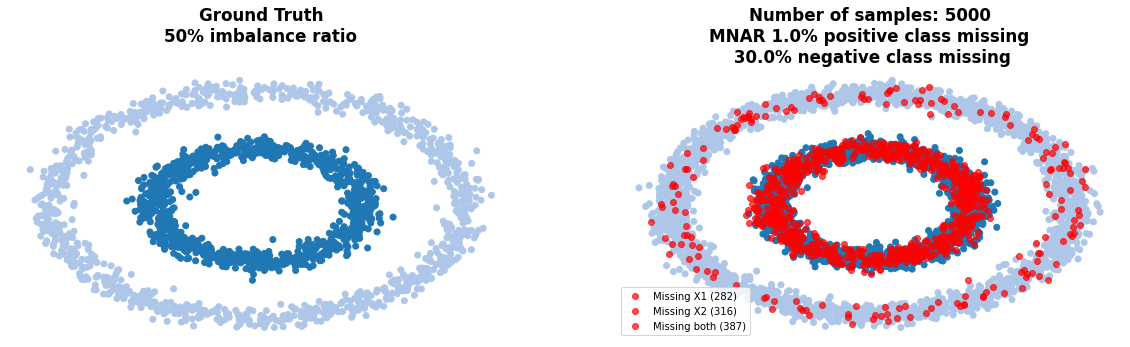

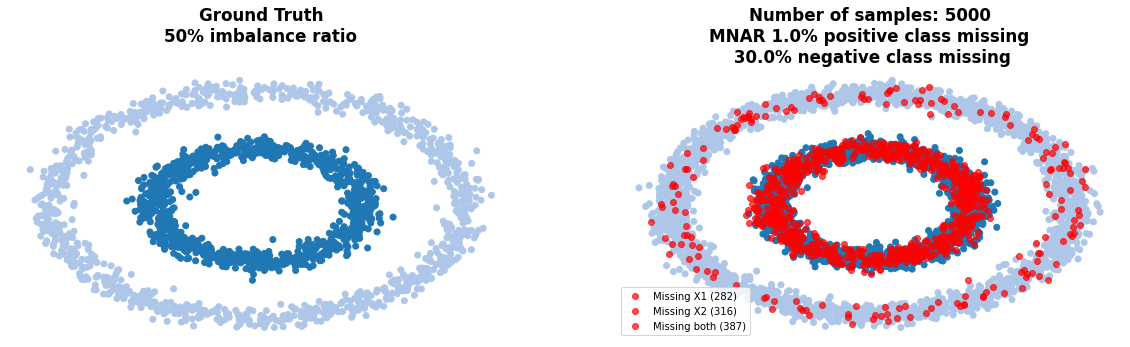

In [7]:
from generateToyDataset import DatasetGenerator

dataset = DatasetGenerator(name='circles', num_samples=5000, ratio_of_missing_values=.1, imbalance_ratio=.5, num_samples_gt=2000, verbosity=1, random_state=47)
dataset.generate_missing_coordinates(missingness_mechanism='MNAR', allow_missing_both_coordinates=False, missing_first_quarter=False, ratio_missing_per_class=[.01, .3])
dataset.plot(verbosity=1)


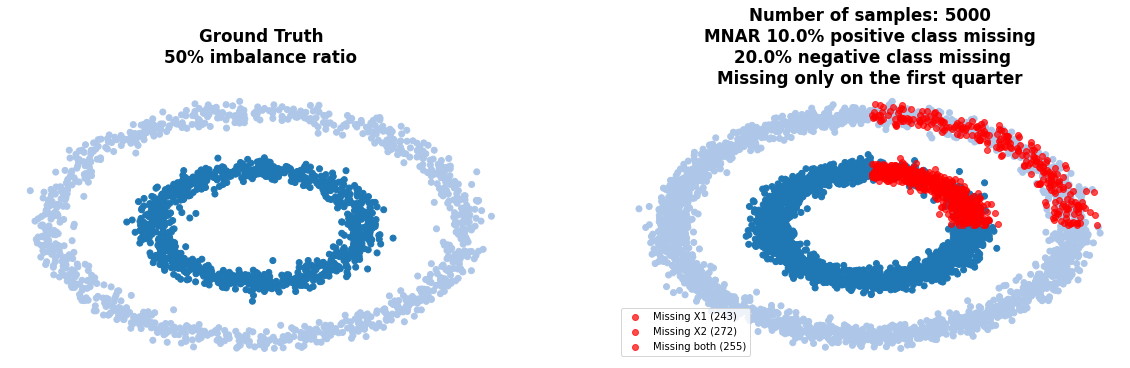

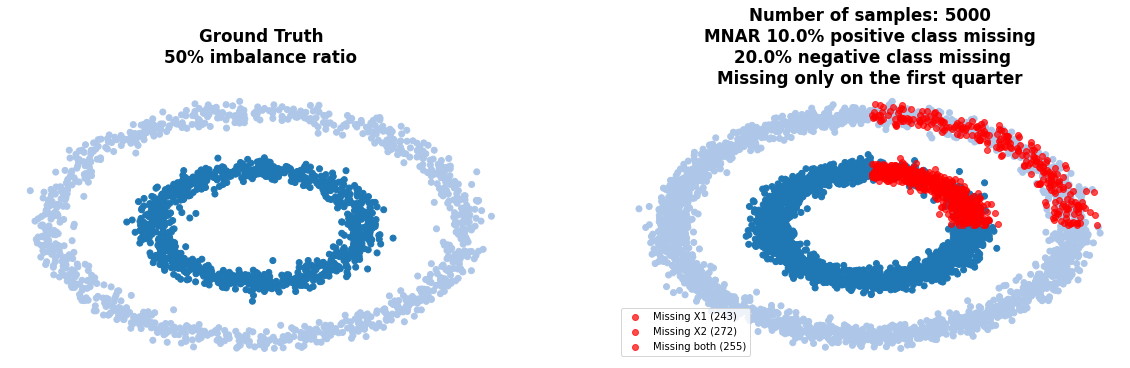

In [8]:
from generateToyDataset import DatasetGenerator

dataset = DatasetGenerator(name='circles', num_samples=5000, ratio_of_missing_values=.1, imbalance_ratio=.5, num_samples_gt=2000, verbosity=1, random_state=47)
dataset.generate_missing_coordinates(missingness_mechanism='MNAR', allow_missing_both_coordinates=False, missing_first_quarter=True, ratio_missing_per_class=[.1, .2])
dataset.plot(verbosity=1)

In [42]:
dataset = DatasetGenerator(name='circles', num_samples=5000, ratio_of_missing_values=.1, imbalance_ratio=.5, num_samples_gt=2000, verbosity=1, random_state=47)
dataset.generate_missing_coordinates(missingness_mechanism='MNAR', allow_missing_both_coordinates=False, missing_first_quarter=True, ratio_missing_per_class=[.1, .2])
X, X_gt, y, y_gt = dataset.get_data()

**Generating the data**

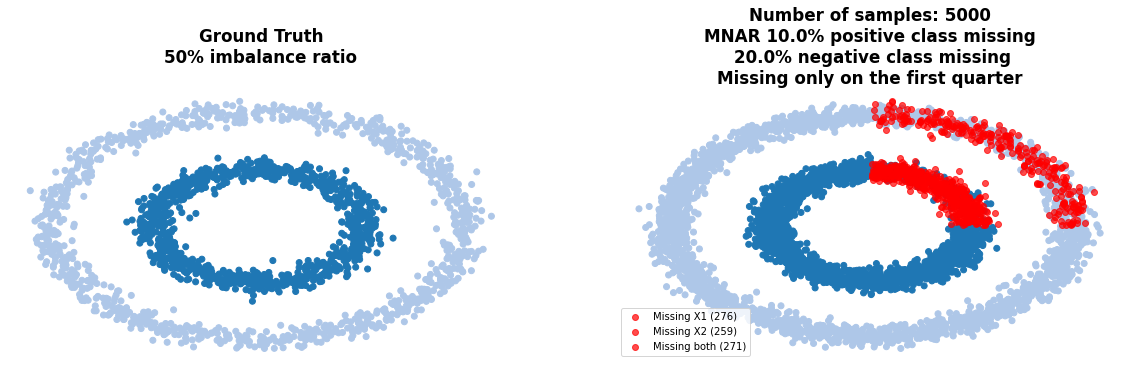

In [14]:
ratio_of_missing_values = 0.2
imbalance_ratio = .5

dataset = DatasetGenerator(name='circles', num_samples=5000, ratio_of_missing_values=ratio_of_missing_values, imbalance_ratio=imbalance_ratio, num_samples_gt=2000, verbosity=1, random_state=47)
dataset.generate_missing_coordinates(missingness_mechanism='MNAR', allow_missing_both_coordinates=False, missing_first_quarter=True, ratio_missing_per_class=[.1, .2])
X, X_gt, y, y_gt = dataset.get_data()

## Missing error method

**The method `missing_error` aims fills a whole line (with the prior on the missingness) when a coordinate for `X_i` is missing.**

**Conclusion of this method:**

    * As we can see it put some weight in area of the space that should be empty, increasing the reconstruction error.

1000 samples created


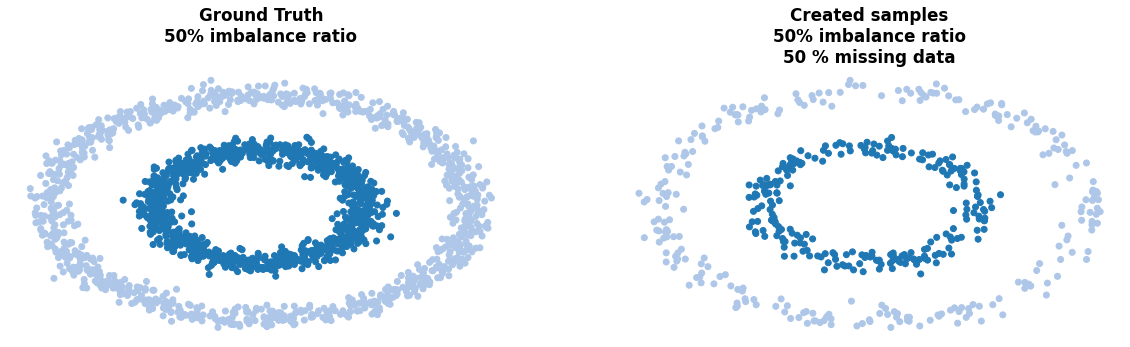

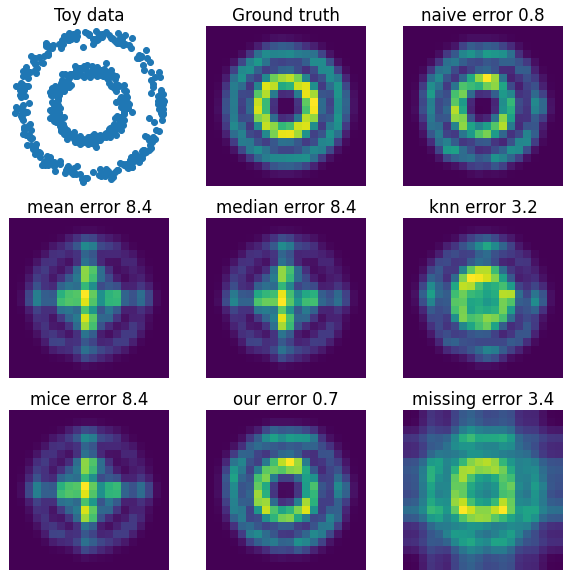

In [14]:
from utils import compare_imputation_methods

dataset_names = ['circles']#'moons'
for dataset in dataset_names:
    compare_imputation_methods(dataset=dataset, 
                               num_samples=1000, 
                               ratio_of_missing_values=.5,
                               imbalance_ratio=.5,
                               kernel_bandwidth=.2)

## Missing error with limited range method
**The method `missing_error_limited_range` does not fill the whole line (with the prior on the missingness) when a coordinate of `X_i` is missing, but only the "explored" areas of the feature space. To do that, we first need to compute a mask on the domain to indicate where on the feature space we can put weight.**

**Conclusion:**

    * As we can see it solved the problem of putting mass on empty parts of the feature space, but create discrete artifacts on the reconstructed distribution. This has to be explored, but the first explannation that comes to mind (and looking at the space mask), is that it binarize too much the feature space, allowing to put mass on some squares but not on neighbors one... Increasing the resolution of the feature space might partially solve the problem.

1000 samples created


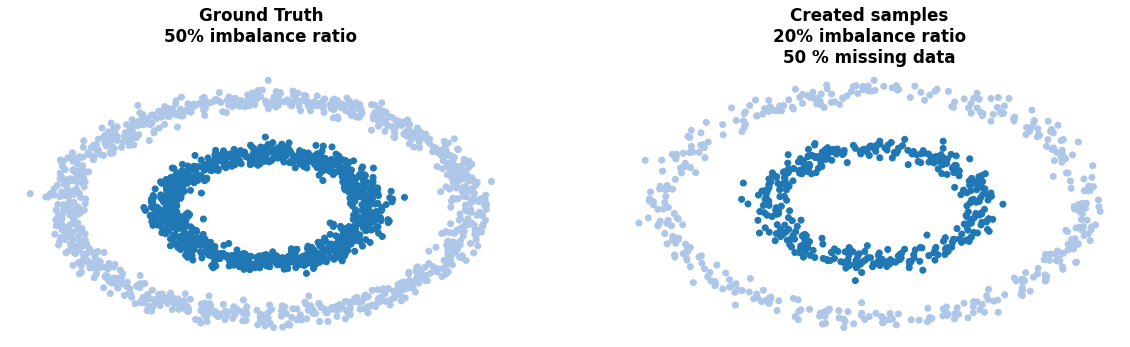

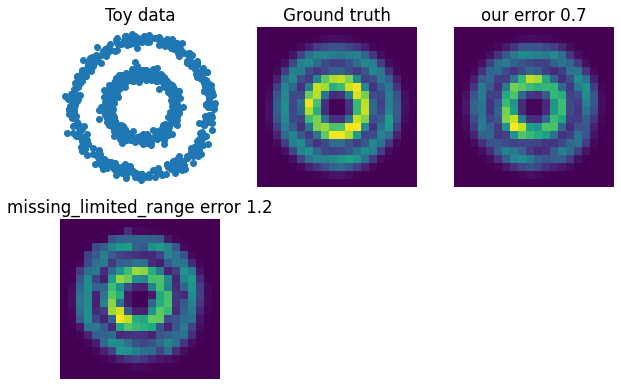

In [169]:
from utils import compare_imputation_methods

dataset_names = ['circles']#'moons'
for dataset in dataset_names:
    compare_imputation_methods(dataset=dataset, 
                               num_samples=1000, 
                               ratio_of_missing_values=.2,
                               imbalance_ratio=.5,
                               kernel_bandwidth=.2, 
                               resolution=50,
                               methods=['our', "missing_limited_range"])

**Here we increase the resolution of the feature space from `20` to `50`.**


**Conclusion:**

    * Although increasing the resolution goes towards reducing the phenomenom 

1000 samples created


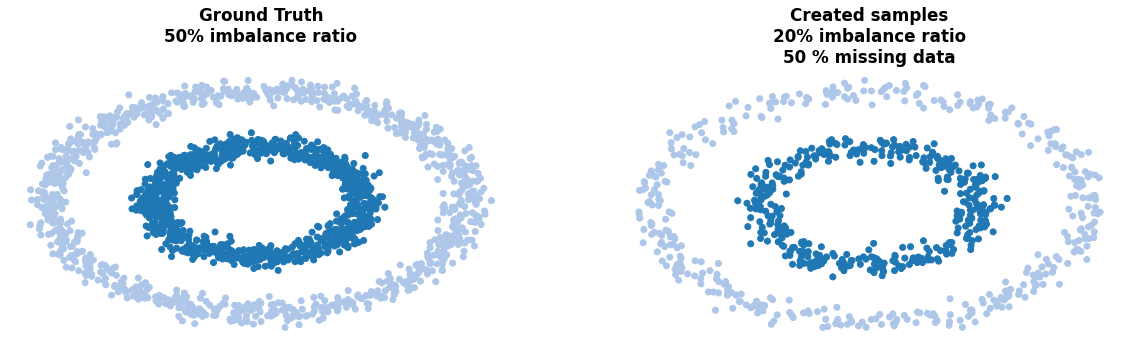

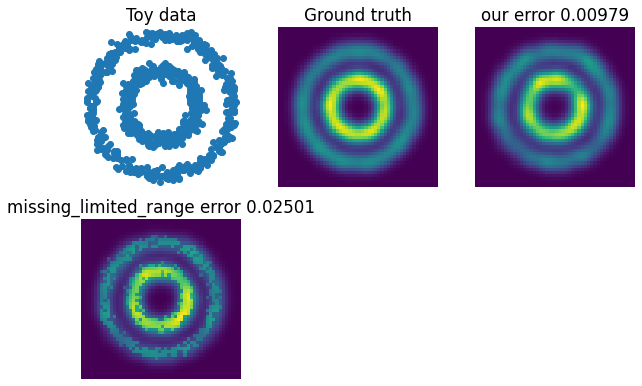

In [174]:
from utils import compare_imputation_methods

dataset_names = ['circles']#'moons'
for dataset in dataset_names:
    compare_imputation_methods(dataset=dataset, 
                               num_samples=1000, 
                               ratio_of_missing_values=.2,
                               imbalance_ratio=.5,
                               kernel_bandwidth=.2, 
                               resolution=50,
                               methods=['our', "missing_limited_range"])

<AxesSubplot:>

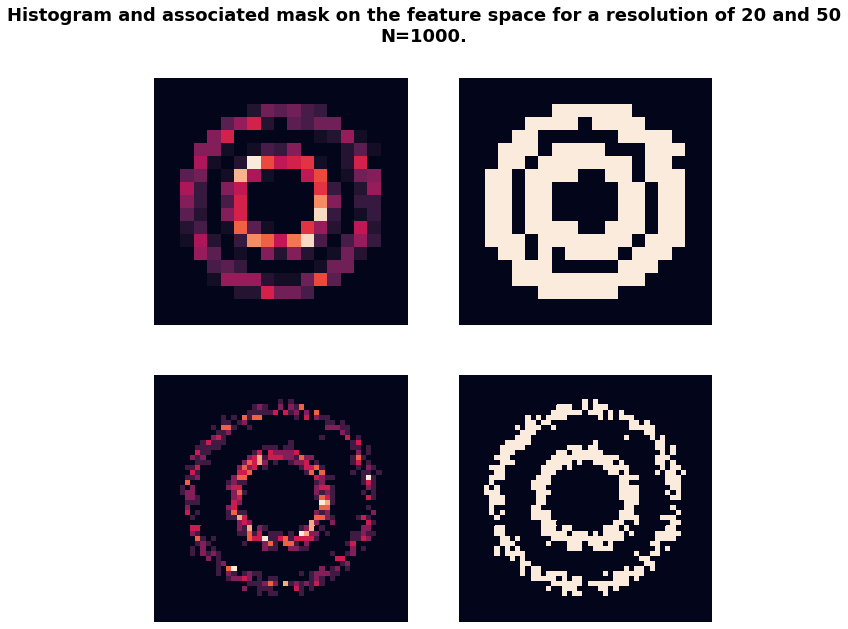

In [193]:
# (1) Create toy and ground truth data
X, Xgt, Y, Ygt = create_dataset(name="circles", 
                              num_samples=1000, 
                              ratio_of_missing_values=ratio_of_missing_values, 
                              imbalance_ratio=imbalance_ratio,
                              provide_labels=True, 
                              verbose=False)

fig, axes = plt.subplots(2, 2, figsize=(10, 10)); axes = axes.flatten()
fig.suptitle("Histogram and associated mask on the feature space for a resolution of 20 and 50\nN=1000.", weight='bold', fontsize=18);[ax.axis('off') for ax in axes] 
resolution = 20
m = [not np.isnan(np.sum(X[i,:])) for i in range(X.shape[0])]; X_prior = X[m,:]; W = np.linspace(-2.5,2.5,resolution).shape[0]
hist2d, _, _ = np.histogram2d(X_prior[:,0], X_prior[:,1], bins=[np.linspace(-2.5,2.5,resolution), np.linspace(-2.5,2.5,resolution)])
sns.heatmap(hist2d, ax=axes[0], cbar=False); sns.heatmap(hist2d>0, ax=axes[1], cbar=False)
resolution = 50
m = [not np.isnan(np.sum(X[i,:])) for i in range(X.shape[0])]; X_prior = X[m,:]; W = np.linspace(-2.5,2.5,resolution).shape[0]
hist2d, _, _ = np.histogram2d(X_prior[:,0], X_prior[:,1], bins=[np.linspace(-2.5,2.5,resolution), np.linspace(-2.5,2.5,resolution)])
sns.heatmap(hist2d, ax=axes[2], cbar=False); sns.heatmap(hist2d>0, ax=axes[3], cbar=False)

<AxesSubplot:>

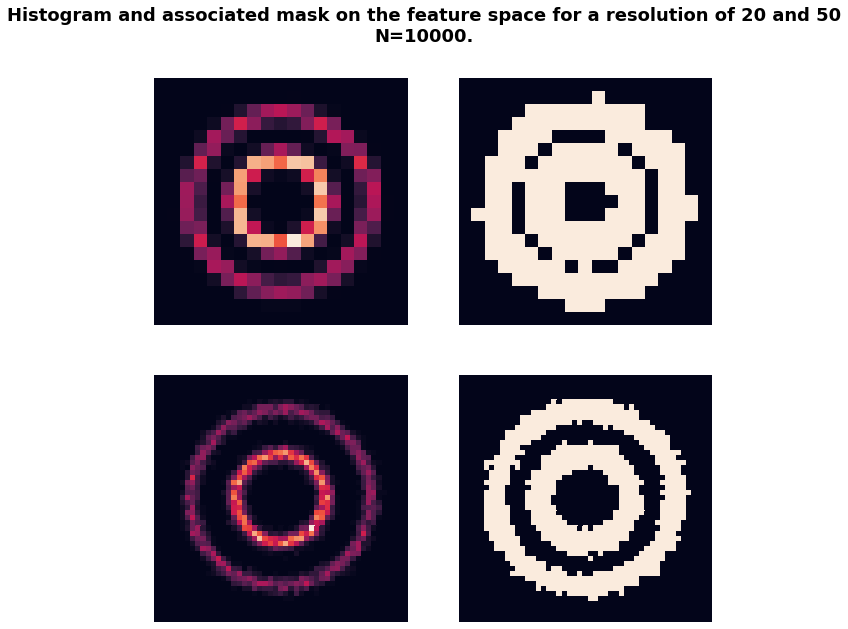

In [194]:
# (1) Create toy and ground truth data
X, Xgt, Y, Ygt = create_dataset(name="circles", 
                              num_samples=10000, 
                              ratio_of_missing_values=ratio_of_missing_values, 
                              imbalance_ratio=imbalance_ratio,
                              provide_labels=True, 
                              verbose=False)

fig, axes = plt.subplots(2, 2, figsize=(10, 10)); axes = axes.flatten()
fig.suptitle("Histogram and associated mask on the feature space for a resolution of 20 and 50\nN=10000.", weight='bold', fontsize=18);[ax.axis('off') for ax in axes] 
resolution = 20
m = [not np.isnan(np.sum(X[i,:])) for i in range(X.shape[0])]; X_prior = X[m,:]; W = np.linspace(-2.5,2.5,resolution).shape[0]
hist2d, _, _ = np.histogram2d(X_prior[:,0], X_prior[:,1], bins=[np.linspace(-2.5,2.5,resolution), np.linspace(-2.5,2.5,resolution)])
sns.heatmap(hist2d, ax=axes[0], cbar=False); sns.heatmap(hist2d>0, ax=axes[1], cbar=False)
resolution = 50
m = [not np.isnan(np.sum(X[i,:])) for i in range(X.shape[0])]; X_prior = X[m,:]; W = np.linspace(-2.5,2.5,resolution).shape[0]
hist2d, _, _ = np.histogram2d(X_prior[:,0], X_prior[:,1], bins=[np.linspace(-2.5,2.5,resolution), np.linspace(-2.5,2.5,resolution)])
sns.heatmap(hist2d, ax=axes[2], cbar=False); sns.heatmap(hist2d>0, ax=axes[3], cbar=False)

#### Functions

In [191]:
xygrid = np.meshgrid(np.linspace(-2.5,2.5,resolution),np.linspace(-2.5,2.5,resolution))
H,W = xygrid[0].shape
hat_f = np.zeros_like(xygrid[0])  # init. the pdf estimation

if method=='missing_limited_range':
    # See documentation
    from stats import kernel_based_pdf_estimation_z_prior_limited_range
    h = bandwidth

    # Compute the space mask to be sure not to add contribution on expty space, based on the resolution of the space
    m = [not np.isnan(np.sum(data[i,:])) for i in range(data.shape[0])]
    X_prior = data[m,:]
    hist2d, _, _ = np.histogram2d(X_prior[:,0], X_prior[:,1], bins=[np.linspace(-2.5,2.5,resolution), np.linspace(-2.5,2.5,resolution)])
    hist2d_up = np.concatenate([np.concatenate([hist2d, np.zeros((1, W-1))], axis=0), np.zeros((H, 1))], axis=1)
    mask_space = hist2d_up>0
    for i in range(H):
        for j in range(W):
            x = xygrid[0][i,j]
            y = xygrid[1][i,j]
            hat_f[i,j] = kernel_based_pdf_estimation_z_prior_limited_range(data,x=[x,y], put_weight=mask_space[i,j], h=h)  

##############################################################################
####### Kernel_based_pdf_estimation_with_missing_priors_limited_range#########
##############################################################################

def kernel_based_pdf_estimation_z_prior_limited_range(X, x=None, h=.2, put_weight=1, verbose=0):
    """
    Estimate the pdf distribution of "X" at "x" using the set of observations X[i,:]. x has lenght k (the dimension of the problem), X has shape nxk (n observations of dimension k). 
    X can have missing values which should be filled with np.nan. A Kernel approximation is computed when the coordinates of the observations are know. 
    If a coordinate is unknown, the contribution of this term is replaced by a prior on the missingness distribution of that coordinate, computed from all the other samples. *The contribution is limited to the range of values, based on the rest of the dataset.*
    
    Example: 
    X = np.random.random((10,3))  # 10 Observations of a 3d problem
    X[0,1] = np.nan; X[4,2] = np.nan  # We don't know some entries. 
    h = .1  # bandwidth of the gaussian kernel
    x = [0.1, 0.1, 0.1]  # where we want to evaluate the pdf (in the 3d space)
    pdf_x = kernel_based_pdf_estimation_z_prior_limited_range(X,x=x,h=h,verbose=0)
    print('The prob at {} is {}.format(x,pdf_x))

    """

    # Computation of the missingness priors: [P(Z_1 = 1), ... ,  P(Z_K = 1)]
    Z_prior = np.array([np.mean(~np.isnan(X[:,i])) for i in range(X.shape[1])])
    hat_f = F_z_prior_limited_range(X=X, Z_prior=Z_prior, put_weight=put_weight, x=x, h=h)
    return hat_f


#@jit(nopython=True, parallel=True)
def F_z_prior_limited_range(X=None, Z_prior=None, x=None, put_weight=0,  h=.2, verbose=0):
    """
    Computation of the pdf at x, using the prior on the missingness meachanism of each features. 
    Z_priors contains the empirical probability that feature j/k is missing, which are used as prior when the contribution of sample with partially missing data is calculated.
    """
    # number "training" samples 
    n = X.shape[0]      

    # init 
    hat_f = []  

    # Compute contribution of each samples to the estimation of the pdf at point x 
    for X_i in X:
        hat_f.append(f_xi_z_prior_limited_range(X_i, x, Z_prior, put_weight, h))
    hat_f = np.mean(np.array(hat_f))         
    return hat_f

#@jit(nopython=True, parallel=True)
def f_xi_z_prior_limited_range(X_i, x, Z_prior, put_weight, h):
    """
    Contribution of the X_i sample to the estimation of the pdf of X at x. 
    Z_priors contains the empirical probability that feature j/k is missing, which are used as prior when the contribution of sample with partially missing data is calculated.
    """
    k = Z_prior.shape[0]  # dimension of the space of samples. 
    K = lambda u: 1/np.sqrt(2*np.pi) * np.exp(-u**2 / 2)  # Define the kernel

    # Since we are using a isomorph kernel, each axis can be handeled independently. 
    hat_fi = 1
    coords_missing = np.isnan(X_i)  # unknown coordinates of X_i

    for j in range(k):
        if not coords_missing[j]: # we know the j-th coordinate of X_i 
            # We can compute the contribution of the jth coordinate using the standard term
            hat_fi *= 1/h * K( (x[j]-X_i[j])/h )

        if coords_missing[j]:  # we don't know the j-th coordinate, 
            if put_weight: # We put weight only if this part of the space is explored by the distribution.
                # We use prior on the missingness mechanism associated to this coordinates.
                hat_fi *= Z_prior[j]
            else:
                hat_fi *= 0
    return hat_fi

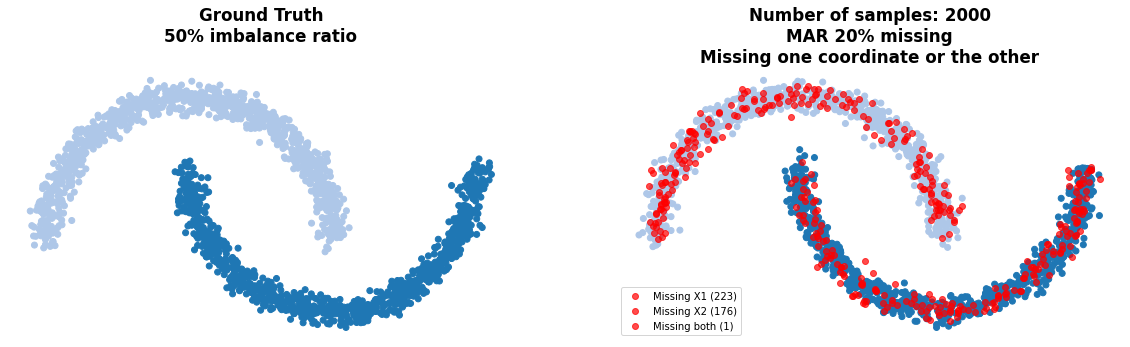

In [109]:
# (1) Create toy and ground truth data
dataset = DatasetGenerator(name='moons', 
                           num_samples=2000, 
                           ratio_of_missing_values=ratio_of_missing_values, 
                           imbalance_ratio=imbalance_ratio, 
                           num_samples_gt=2000, 
                           verbosity=1, 
                           random_state=105)

dataset.generate_missing_coordinates(missingness_mechanism='MAR', allow_missing_both_coordinates=False, missing_first_quarter=False, ratio_missing_per_class=[.1, .2])
X, X_gt, _, _ = dataset.get_data()

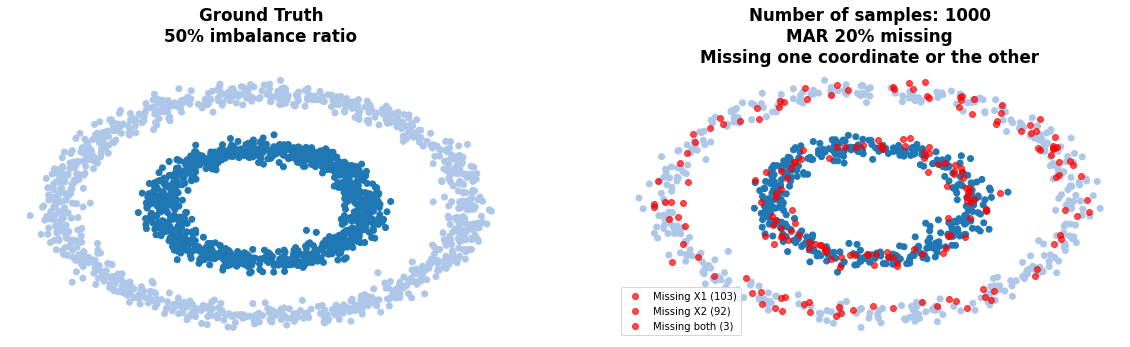

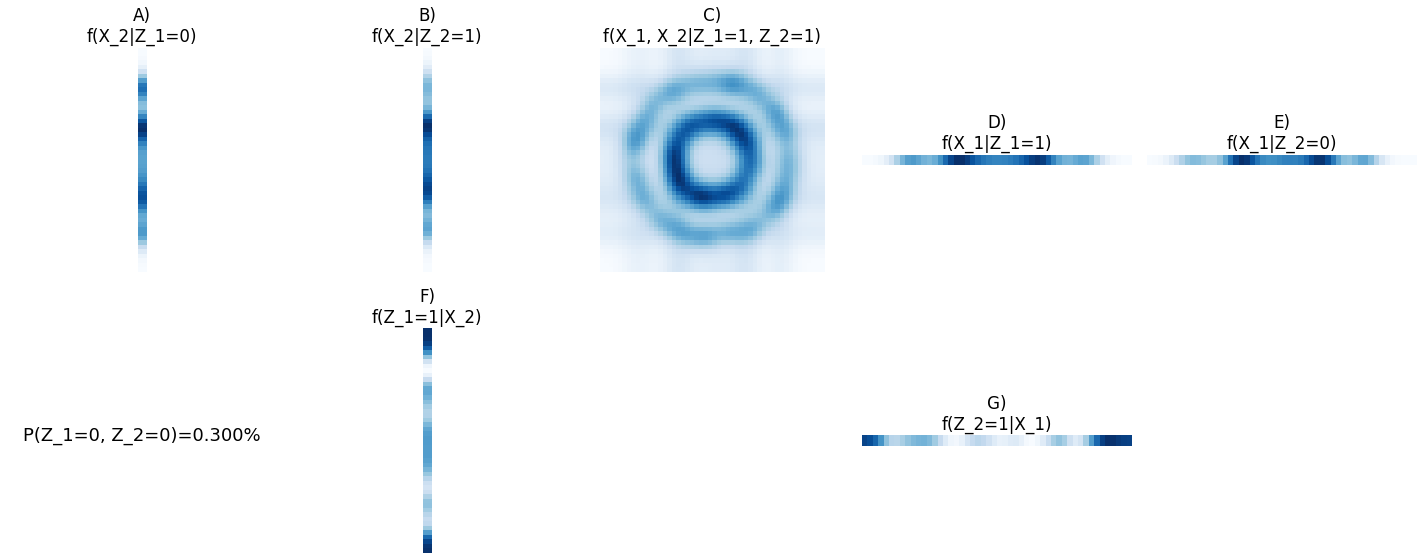

In [ ]:
num_samples=1000
ratio_of_missing_values=.2
imbalance_ratio=.5
resolution=20
methods=["side_spaces"]
dataset = 'circles'

h = .2

# (1) Create toy and ground truth data
dataset = DatasetGenerator(name='circles', 
                           num_samples=num_samples, 
                           ratio_of_missing_values=ratio_of_missing_values, 
                           imbalance_ratio=imbalance_ratio, 
                           num_samples_gt=2000, 
                           verbosity=1, 
                           random_state=105)

dataset.generate_missing_coordinates(missingness_mechanism='MAR', allow_missing_both_coordinates=False, missing_first_quarter=False, ratio_missing_per_class=[.1, .2])
X, X_gt, _, _ = dataset.get_data()

from stats import kernel_based_pdf_estimation_xz
hat_f, hat_f_1, hat_f_2, hat_f_z1, hat_f_z2, hat_f_2_marginal, hat_f_1_marginal = kernel_based_pdf_estimation_xz(X=X, h=h, resolution=50, verbose=1)

0.0842613350467886

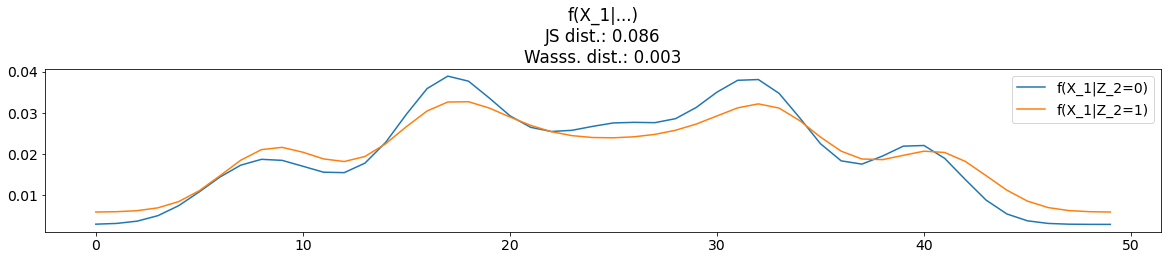

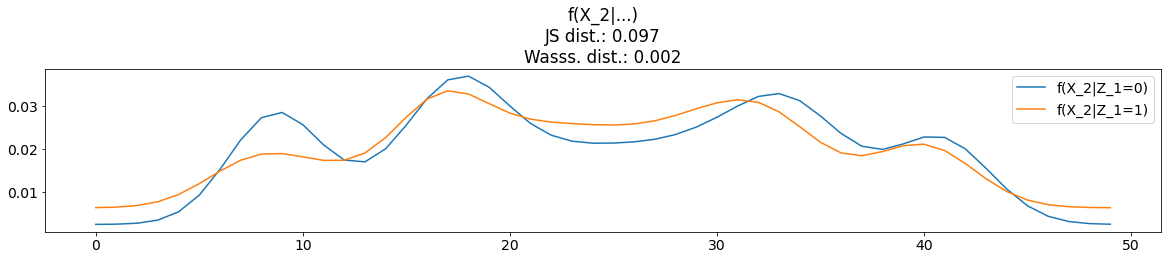

In [148]:
from scipy.spatial import distance
from scipy.stats import wasserstein_distance


fi(20, 3)
plt.plot(hat_f_1, label='f(X_1|Z_2=0)')
plt.plot(hat_f_1_marginal, label='f(X_1|Z_2=1)')
plt.title("f(X_1|...)\nJS dist.: {:.3f}\nWasss. dist.: {:.3f}".format(distance.jensenshannon(hat_f_1, hat_f_1_marginal, 2.0), wasserstein_distance(hat_f_1, hat_f_1_marginal)))
plt.legend()
fi(20, 3)
plt.plot(hat_f_2, label='f(X_2|Z_1=0)')
plt.plot(hat_f_2_marginal, label='f(X_2|Z_1=1)')
plt.title("f(X_2|...)\nJS dist.: {:.3f}\nWasss. dist.: {:.3f}".format(distance.jensenshannon(hat_f_2, hat_f_2_marginal, 2.0), wasserstein_distance(hat_f_2, hat_f_2_marginal)))
plt.legend()


distance.jensenshannon(hat_f_1, hat_f_1_marginal, 2.0)
distance.jensenshannon(hat_f_1, hat_f_2_marginal, 2.0)

In [189]:
num_samples=20000
ratio_of_missing_values=.2
imbalance_ratio=.5
resolution=50
methods=["side_spaces"]
dataset = 'circles'

h = .2

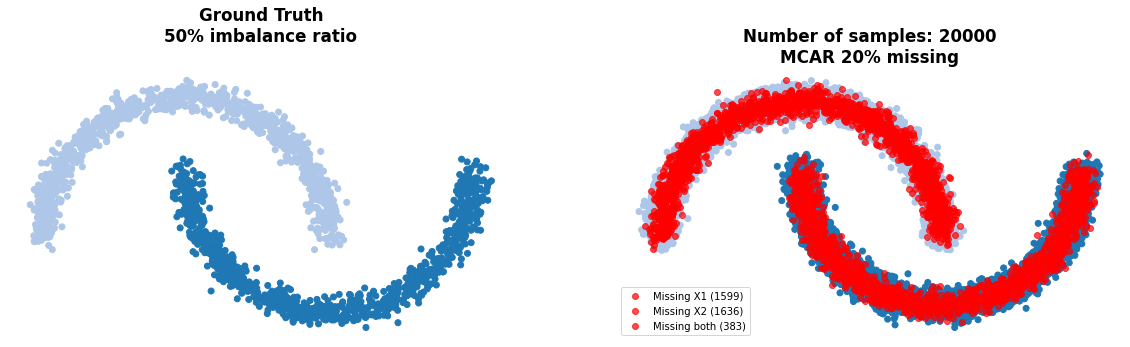

In [190]:
# (1) Create toy and ground truth data
dataset = DatasetGenerator(name='moons', 
                           num_samples=num_samples, 
                           ratio_of_missing_values=ratio_of_missing_values, 
                           imbalance_ratio=imbalance_ratio, 
                           num_samples_gt=2000, 
                           verbosity=1, 
                           random_state=105)

dataset.generate_missing_coordinates(missingness_mechanism='MCAR', allow_missing_both_coordinates=False, missing_first_quarter=False, ratio_missing_per_class=[.1, .2])
X, X_gt, _, _ = dataset.get_data()

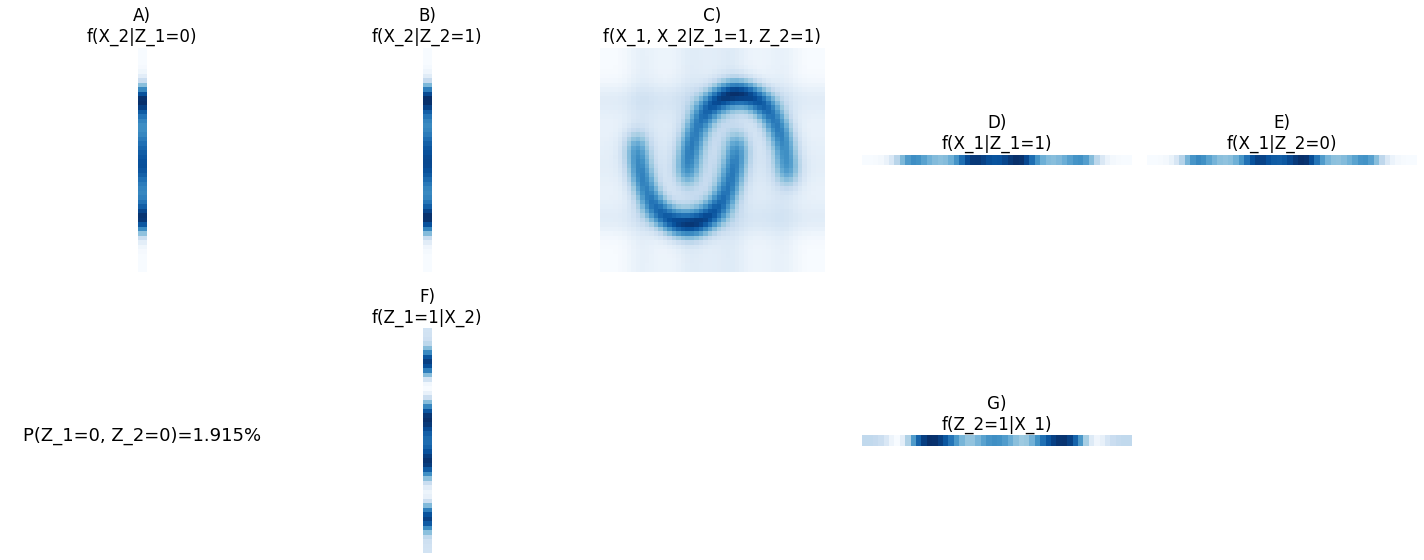

In [191]:
from stats import kernel_based_pdf_estimation_xz
hat_f, hat_f_0, hat_f_1, hat_f_2, hat_f_z1, hat_f_z2, hat_f_1_marginal, hat_f_2_marginal = kernel_based_pdf_estimation_xz(X=X, h=h, resolution=resolution, verbose=1)

0.09635266587483186

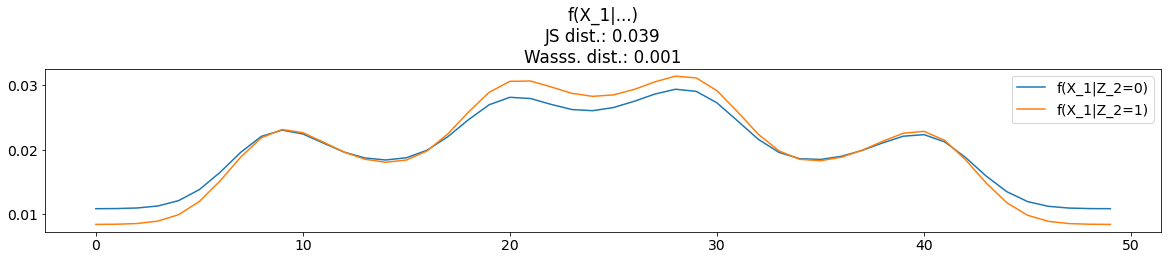

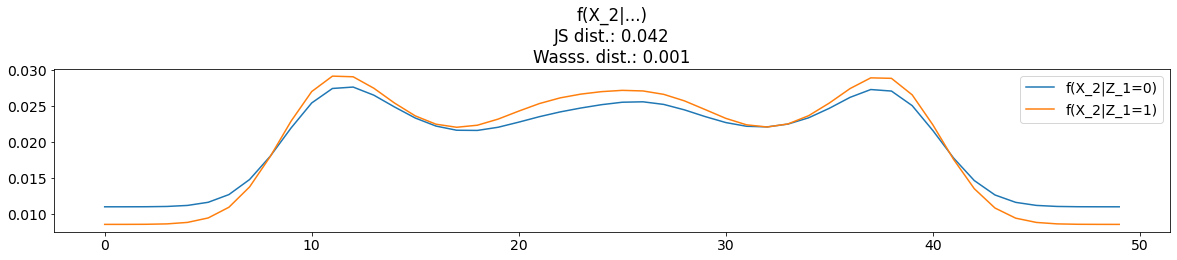

In [192]:
from scipy.spatial import distance
from scipy.stats import wasserstein_distance

fi(20, 3)
plt.plot(hat_f_1, label='f(X_1|Z_2=0)')
plt.plot(hat_f_1_marginal, label='f(X_1|Z_2=1)')
plt.title("f(X_1|...)\nJS dist.: {:.3f}\nWasss. dist.: {:.3f}".format(distance.jensenshannon(hat_f_1, hat_f_1_marginal, 2.0), wasserstein_distance(hat_f_1, hat_f_1_marginal)))
plt.legend()
fi(20, 3)
plt.plot(hat_f_2, label='f(X_2|Z_1=0)')
plt.plot(hat_f_2_marginal, label='f(X_2|Z_1=1)')
plt.title("f(X_2|...)\nJS dist.: {:.3f}\nWasss. dist.: {:.3f}".format(distance.jensenshannon(hat_f_2, hat_f_2_marginal, 2.0), wasserstein_distance(hat_f_2, hat_f_2_marginal)))
plt.legend()


distance.jensenshannon(hat_f_1, hat_f_1_marginal, 2.0)
distance.jensenshannon(hat_f_1, hat_f_2_marginal, 2.0)

In [185]:
# (1) Create toy and ground truth data
dataset = DatasetGenerator(name='circles', 
                           num_samples=num_samples, 
                           ratio_of_missing_values=ratio_of_missing_values, 
                           imbalance_ratio=imbalance_ratio, 
                           num_samples_gt=2000, 
                           verbosity=1, 
                           random_state=105)

dataset.generate_missing_coordinates(missingness_mechanism='MAR', allow_missing_both_coordinates=False, missing_first_quarter=True, ratio_missing_per_class=[.1, .2])
X, X_gt, _, _ = dataset.get_data()

In [188]:
from stats import kernel_based_pdf_estimation_xz
hat_f, hat_f_0, hat_f_1, hat_f_2, hat_f_z1, hat_f_z2, hat_f_1_marginal, hat_f_2_marginal = kernel_based_pdf_estimation_xz(X=X, h=h, resolution=resolution, verbose=1)

KeyboardInterrupt: 

In [ ]:
from scipy.spatial import distance
from scipy.stats import wasserstein_distance

fi(20, 2)
plt.plot(hat_f_1, label='f(X_1|Z_2=0)')
plt.plot(hat_f_1_marginal, label='f(X_1|Z_2=1)')
plt.title("f(X_1|...)\nJS dist.: {:.3f}\nWasss. dist.: {:.10f}".format(distance.jensenshannon(hat_f_1, hat_f_1_marginal, 2.0), wasserstein_distance(hat_f_1, hat_f_1_marginal)))
plt.legend()
fi(20, 2)
plt.plot(hat_f_2, label='f(X_2|Z_1=0)')
plt.plot(hat_f_2_marginal, label='f(X_2|Z_1=1)')
plt.title("f(X_2|...)\nJS dist.: {:.3f}\nWasss. dist.: {:.10f}".format(distance.jensenshannon(hat_f_2, hat_f_2_marginal, 2.0), wasserstein_distance(hat_f_2, hat_f_2_marginal)))
plt.legend()


distance.jensenshannon(hat_f_1, hat_f_1_marginal, 2.0)
distance.jensenshannon(hat_f_1, hat_f_2_marginal, 2.0)

0.03913923428174224

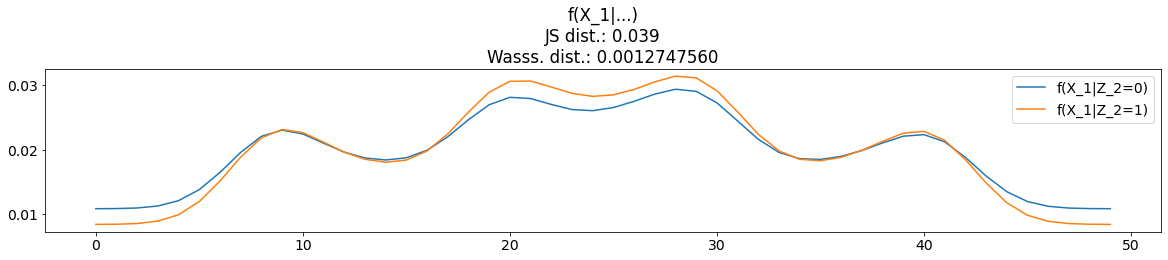

In [179]:
from scipy.spatial import distance
from scipy.stats import wasserstein_distance

fi(20, 3)
plt.plot(hat_f_1, label='f(X_1|Z_2=0)')
plt.plot(hat_f_2_marginal, label='f(X_1|Z_2=1)')
plt.title("f(X_1|...)\nJS dist.: {:.3f}\nWasss. dist.: {:.10f}".format(distance.jensenshannon(hat_f_1, hat_f_2_marginal, 2.0), wasserstein_distance(hat_f_1, hat_f_2_marginal)))
plt.legend()
fi(20, 3)
plt.plot(hat_f_2, label='f(X_2|Z_1=0)')
plt.plot(hat_f_1_marginal, label='f(X_2|Z_1=1)')
plt.title("f(X_2|...)\nJS dist.: {:.3f}\nWasss. dist.: {:.10f}".format(distance.jensenshannon(hat_f_2, hat_f_1_marginal, 2.0), wasserstein_distance(hat_f_2, hat_f_1_marginal)))
plt.legend()


distance.jensenshannon(hat_f_1, hat_f_2_marginal, 2.0)


# Dev functionnalities  - Managing experiments

In [301]:
from glob import glob 
from const import DATA_DIR

experiments_path = glob(os.path.join(DATA_DIR, 'experiments',dataset_name, '*', 'dataset_log.json'))
experiments_path

['/Users/samperochon/Duke/notes_on_stats/doc/data/experiments/circles/7/dataset_log.json',
 '/Users/samperochon/Duke/notes_on_stats/doc/data/experiments/circles/6/dataset_log.json',
 '/Users/samperochon/Duke/notes_on_stats/doc/data/experiments/circles/1/dataset_log.json',
 '/Users/samperochon/Duke/notes_on_stats/doc/data/experiments/circles/4/dataset_log.json',
 '/Users/samperochon/Duke/notes_on_stats/doc/data/experiments/circles/3/dataset_log.json',
 '/Users/samperochon/Duke/notes_on_stats/doc/data/experiments/circles/5/dataset_log.json']

In [ ]:
from const import DATA_DIR

from glob import glob 
import json

experiments_paths = glob(os.path.join(DATA_DIR, 'experiments',dataset_name, '*'))

for experiments_path in experiments_paths:
    experiment_path = os.path.join(experiments_path, 'experiment_log.json')
    dataset_path = os.path.join(experiments_path, 'dataset_log.json')

    if os.path.isfile(experiment_path) and os.path.isfile(dataset_path):

        with open(experiment_path) as experiment_json:

            # Load experiment data
            experiment_data = json.load(experiment_json)

        with open(dataset_path) as data_json:

            # Load experiment data
            dataset_data = json.load(data_json)
dataset_data
            

# Dev computations  - Making sure of the h exponent 

In [ ]:
from utils import estimate_pdf

# Estimation of f(X_1,X_2|Z_1=1, Z_2=1), f(X_2|Z_1=0,Z_2=1) and f(X_1|Z_1=1,Z_2=0)
hat_f, hat_f_0, hat_f_1, hat_f_2 = estimate_pdf(data=X, method='side_spaces', resolution=resolution, bandwidth=h) 

In [ ]:
bandwidth = h
data = X
xygrid = np.meshgrid(np.linspace(-2.5,2.5,resolution),np.linspace(-2.5,2.5,resolution))
H,W = xygrid[0].shape
hat_f = np.zeros_like(xygrid[0])  # init. the pdf estimation


# See documentation
from stats import kernel_based_pdf_estimation_side_spaces
h = bandwidth
hat_f_1 = np.zeros_like(xygrid[0])  # init. the pdf estimation
hat_f_2 = np.zeros_like(xygrid[0])  # init. the pdf estimation
hat_f_0= np.zeros_like(xygrid[0])  # init. the pdf estimation

hat_f_2_samples=[]
for i in range(H):
    for j in range(W):
        x = xygrid[0][i,j]
        y = xygrid[1][i,j]
        # Computing contribution on coordinates i, j of hat_f, and coordinate i of hat_f_1 and coordinate j of hat_f_2
        hat_f[i,j], hat_f_1[i,j], hat_f_2[i,j] =  kernel_based_pdf_estimation_side_spaces(X=data, x=[x,y], h=h)

# Average the contribution of all j's coordinate on this horizontal line
hat_f_1 = np.mean(hat_f_1, axis=0)

# Average the contribution of all i's coordinate to form the vertical line
hat_f_2 = np.mean(hat_f_2, axis=1)   



In [ ]:
x

2.5

In [ ]:
X_i = X[0]
x = [x, y]

In [ ]:
k = X_i.shape[0]  # dimension of the space of samples. 
K = lambda u: 1/np.sqrt(2*np.pi) * np.exp(-u**2 / 2)  # Define the kernel
# Define the switch function between coordiantes. It is needed as if X1 is missing, we need to build the distribution of x_2 knowing xi is missing, so the other line...
# The switch function in general should send 0 to 1 and 1 to 0 in 2D. In 3D, 0 should be sent to [1,2], 1 to [0,2] and 2 to [0,1].
switch = lambda j: -j+1

# Since we are using a isomorph kernel, each axis can be handeled independently. 
hat_fi = 1
hat_fi_missing = [1, 1]
hat_fi_empty = 1

coords_missing = np.isnan(X_i)  # unknown coordinates of X_i

# Handle the case where both are missing

if coords_missing.sum() == k:
    hat_fi_empty = 1 
    
else:

    for j in range(k):
        if not coords_missing[j]: # we know the j-th coordinate of X_i 
            # We can compute the contribution of the jth coordinate using the standard term
            hat_fi *= 1/bandwidth * K( (x[j]-X_i[j])/bandwidth )
        if coords_missing[j]:  # we don't know the j-th coordinate, 
            # We use prior on the missingness mechanism associated to this coordinates.
            hat_fi_missing[switch(j)] *= 1/bandwidth * K( (x[switch(j)]-X_i[switch(j)])/bandwidth ) # To check

hat_fi, hat_fi_empty, hat_fi_missing[0], hat_fi_missing[1]

(1.5196583098531924e-16, 1, 1.5196583098531924e-16)

In [126]:
coords_missing.sum() == k

1

In [127]:
k

2

In [ ]:
# Normalization of the distributions
hat_f /= hat_f.sum();hat_f_1 /= hat_f_1.sum();hat_f_2 /= hat_f_2.sum()

# Computation of the marginals
hat_f_1_marginal = hat_f.sum(axis=1);hat_f_2_marginal = hat_f.sum(axis=0)

# Z_prior reflects P(Z_1=1, Z_2=1, ... Z_k=1)
Z_prior = np.array([np.mean(~np.isnan(X[:,i])) for i in range(X.shape[1])])

# Estimation of f(Z_1=1|X_2)
#hat_f_z1_knowing_x2 = hat_f_2 * (1-Z_prior[0])/(hat_f_2*(1-Z_prior[0]) + hat_f_2_marginal*Z_prior[0])
#hat_f_z1_knowing_x2 /= hat_f_z1_knowing_x2.sum()

# Estimation of f(Z_1=0|X_2)
hat_f_z1 = hat_f_2_marginal * Z_prior[0]/(hat_f_2_marginal*Z_prior[0] + hat_f_2*(1-Z_prior[0]))
hat_f_z1 /= hat_f_z1.sum()

# Estimation of f(Z_2=1|X_1)
#hat_f_z2_knowing_x1 = hat_f_1 * (1-Z_prior[1])/(hat_f_1*(1-Z_prior[1]) + hat_f_1_marginal*Z_prior[1])
#hat_f_z2_knowing_x1 /= hat_f_z2_knowing_x1.sum()

# Estimation of f(Z_2=0|X_1)
hat_f_z2 = hat_f_1_marginal * Z_prior[1]/(hat_f_1_marginal*Z_prior[1] + hat_f_1*(1-Z_prior[1]))
hat_f_z2 /= hat_f_z2.sum()

In [201]:
def kernel_based_pdf_estimation_xz(X, h=.2, resolution=50, cmap='Blues', verbose=0):
    
    from utils import estimate_pdf

    # Estimation of f(X_1,X_2|Z_1=1, Z_2=1), f(X_2|Z_1=0,Z_2=1) and f(X_1|Z_1=1,Z_2=0)
    hat_f, hat_f_1, hat_f_2 = estimate_pdf(data=X, method='side_spaces', resolution=resolution, bandwidth=h) 
    
    # Normalization of the distributions
    hat_f /= hat_f.sum();hat_f_1 /= hat_f_1.sum();hat_f_2 /= hat_f_2.sum()
    
    # Computation of the marginals
    hat_f_1_marginal = hat_f.sum(axis=1);hat_f_2_marginal = hat_f.sum(axis=0)
    
    # Z_prior reflects P(Z_1=1, Z_2=1, ... Z_k=1)
    Z_prior = np.array([np.mean(~np.isnan(X[:,i])) for i in range(X.shape[1])])

    # Estimation of f(Z_1=1|X_2)
    #hat_f_z1_knowing_x2 = hat_f_2 * (1-Z_prior[0])/(hat_f_2*(1-Z_prior[0]) + hat_f_2_marginal*Z_prior[0])
    #hat_f_z1_knowing_x2 /= hat_f_z1_knowing_x2.sum()
    
    # Estimation of f(Z_1=0|X_2)
    hat_f_z1 = hat_f_2_marginal * Z_prior[0]/(hat_f_2_marginal*Z_prior[0] + hat_f_2*(1-Z_prior[0]))
    hat_f_z1 /= hat_f_z1.sum()
    
    # Estimation of f(Z_2=1|X_1)
    #hat_f_z2_knowing_x1 = hat_f_1 * (1-Z_prior[1])/(hat_f_1*(1-Z_prior[1]) + hat_f_1_marginal*Z_prior[1])
    #hat_f_z2_knowing_x1 /= hat_f_z2_knowing_x1.sum()
    
    # Estimation of f(Z_2=0|X_1)
    hat_f_z2 = hat_f_1_marginal * Z_prior[1]/(hat_f_1_marginal*Z_prior[1] + hat_f_1*(1-Z_prior[1]))
    hat_f_z2 /= hat_f_z2.sum()


    if verbose:

        fig, axes = plt.subplots(2, 5, figsize=(20, 8));axes = axes.flatten()
        axes[0].imshow(hat_f_2[:,None].repeat(2, axis=1), cmap=cmap);axes[0].set_title("A)\nf(X_2|Z_1=0)")
        axes[1].imshow(hat_f_2_marginal[:,None].repeat(2, axis=1), cmap=cmap);axes[1].set_title("B)\nf(X_2|Z_2=1)")
        axes[2].imshow(hat_f, cmap=cmap);axes[2].set_title("C)\nf(X_1, X_2|Z_1=1, Z_2=1)")
        axes[3].imshow(hat_f_1_marginal[None, :].repeat(2, axis=0), cmap=cmap);axes[3].set_title("D)\nf(X_1|Z_1=1)")
        axes[4].imshow(hat_f_1[None, :].repeat(2, axis=0), cmap=cmap);axes[4].set_title("E)\nf(X_1|Z_2=0)")
        
        #axes[5].imshow(hat_f_z1_knowing_x2[:,None].repeat(2, axis=1));axes[5].set_title("f(Z_1=0|X_2)")
        axes[6].imshow(hat_f_z1[:,None].repeat(2, axis=1), cmap=cmap);axes[6].set_title("F)\nf(Z_1=1|X_2)")
        axes[8].imshow(hat_f_z2[None, :].repeat(2, axis=0), cmap=cmap);axes[8].set_title("G)\nf(Z_2=1|X_1)")
        #axes[9].imshow(hat_f_z2_knowing_x1[None, :].repeat(2, axis=0));axes[9].set_title("f(Z_2=0|X_1)")
        
        _ = [ax.axis('off') for ax in axes]; plt.tight_layout()
        
    return hat_f, hat_f_1, hat_f_2, hat_f_z1, hat_f_z2, hat_f_2_marginal, hat_f_1_marginal


##############################################################################
####### Kernel_based_pdf_estimation using the side spaces            #########
##############################################################################


def kernel_based_pdf_estimation_side_spaces(X, x=None, h=.2, verbose=0):
    """
    Estimate the pdf distribution of "X" at "x" using the set of observations X[i,:]. x has lenght k (the dimension of the problem), X has shape nxk (n observations of dimension k). 
    X can have missing values which should be filled with np.nan. A Kernel approximation is computed when the coordinates of the observations are know. 
    If a coordinate is unknown, the contribution of this term is replaced by a prior on the missingness distribution of that coordinate, computed from all the other samples. *The contribution is limited to the range of values, based on the rest of the dataset.*
    
    Example: 
    X = np.random.random((10,3))  # 10 Observations of a 3d problem
    X[0,1] = np.nan; X[4,2] = np.nan  # We don't know some entries. 
    h = .1  # bandwidth of the gaussian kernel
    x = [0.1, 0.1, 0.1]  # where we want to evaluate the pdf (in the 3d space)
    pdf_x = kernel_based_pdf_estimation_z_prior_limited_range(X,x=x,h=h,verbose=0)
    print('The prob at {} is {}.format(x,pdf_x))

    """

    hat_f, hat_f_1, hat_f_2 = F_side_spaces(X=X, x=x, h=h)
    return hat_f, hat_f_1, hat_f_2


#@jit(nopython=True, parallel=True)
def F_side_spaces(X=None, x=None, h=.2, verbose=0):
    """
    Computation of the pdf at x, using the prior on the missingness meachanism of each features. 
    Z_priors contains the empirical probability that feature j/k is missing, which are used as prior when the contribution of sample with partially missing data is calculated.
    """
    # number "training" samples 
    n = X.shape[0]      

    # init 
    hat_f = []
    hat_f_1 = []  
    hat_f_2 = []  

    # Compute contribution of each samples to the estimation of the pdf at point x 
    for X_i in X:
        contribution_f, contribution_f_1, contribution_f_2 = f_xi_side_spaces(X_i, x, h)
        hat_f.append(contribution_f)
        hat_f_1.append(contribution_f_1)
        hat_f_2.append(contribution_f_2)

    hat_f = np.mean(np.array(hat_f))      
    hat_f_1 = np.mean(np.array(hat_f_1))      
    hat_f_2 = np.mean(np.array(hat_f_2))      
    return hat_f, hat_f_1, hat_f_2

#@jit(nopython=True, parallel=True)
def f_xi_side_spaces(X_i, x, h):
    """
    Contribution of the X_i sample to the estimation of the pdf of X at x. 
    Z_priors contains the empirical probability that feature j/k is missing, which are used as prior when the contribution of sample with partially missing data is calculated.
    """
    k = X_i.shape[0]  # dimension of the space of samples. 
    K = lambda u: 1/np.sqrt(2*np.pi) * np.exp(-u**2 / 2)  # Define the kernel
    # Define the switch function between coordiantes. It is needed as if X1 is missing, we need to build the distribution of x_2 knowing xi is missing, so the other line...
    # The switch function in general should send 0 to 1 and 1 to 0 in 2D. In 3D, 0 should be sent to [1,2], 1 to [0,2] and 2 to [0,1].
    switch = lambda j: -j+1

    # Since we are using a isomorph kernel, each axis can be handeled independently. 
    hat_fi = 1
    hat_fi_missing = [1, 1]

    coords_missing = np.isnan(X_i)  # unknown coordinates of X_i

    for j in range(k):
        if not coords_missing[j]: # we know the j-th coordinate of X_i 
            # We can compute the contribution of the jth coordinate using the standard term
            hat_fi *= 1/h * K( (x[j]-X_i[j])/h )
        if coords_missing[j]:  # we don't know the j-th coordinate, 
            # We use prior on the missingness mechanism associated to this coordinates.
            hat_fi_missing[switch(j)] *= 1/h * K( (x[switch(j)]-X_i[switch(j)])/h ) # To check

    return hat_fi, hat_fi_missing[0], hat_fi_missing[1]


# Taking the class Y into account


Now that the estimation of the different distributions, for X and Z are more or less optimal, we can investigate how to use them at the time of prediction.

**We hope that the missingness can be useful to recover some information about the diagnosis, or investigate a way to quantify the certainty/uncertainty of the prediction taking into account the missing vraiables.**


Notes:

- $f_{X_1,X_2|Y}$ is estimated using Matias' data imputation scheme. $f_{X_1|Z_2=0, Y}$ and $f_{X_2|Z_1=0, Y}$ are computed using vanilla kernel based estimation. The missingness distributions $f_{Z_2=0|X_1, Y}$ and $f_{Z_1=0|X_2,Y }$ are estimated based on the Bayes' theorem. 
- We now need to build those distributions **for each class**, hence adding the "knowing $Y$" in the definition of the distributions.

Process:
- We first construct the distributions mentioned above.
- We then classify a test set using all the available information, using maximum likelihood estimation. 

Doing experiment 24!
/!\. Missingness constraints were ambitious. Try lower them to reach the desired criteria.
Ratio of number-wise missing data 0.08 (thres. 0.25)


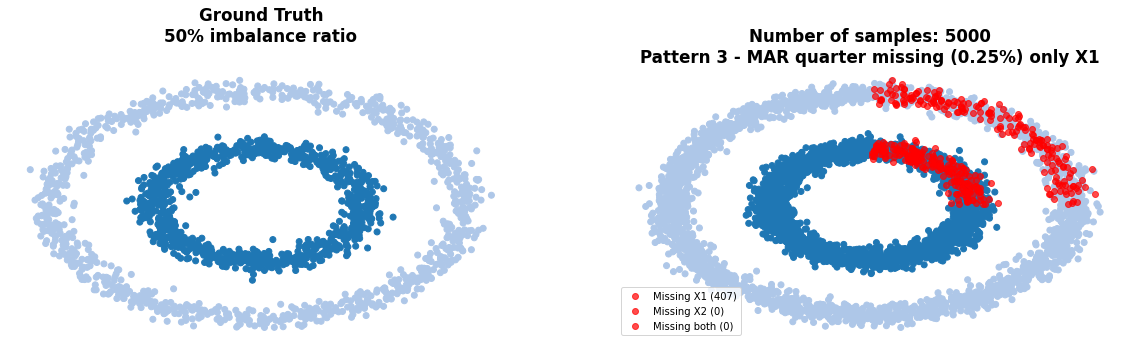

In [ ]:
num_samples=5000
ratio_of_missing_values=.2
imbalance_ratio=.5
resolution=50
methods=["side_spaces"]
dataset_name = 'circles'
h = .2

# Create an experiment
experiment = Experiment(dataset_name='circles', 
                        num_samples=num_samples, 
                        ratio_of_missing_values=ratio_of_missing_values, 
                        imbalance_ratio=imbalance_ratio, 
                        create_experiment=True,
                        verbosity=1, 
                        random_state=47)

# There are no mutual information between Z and X, Y
experiment.dataset.generate_missing_coordinates(missingness_pattern=3, verbosity=1)

# Estimate the pdf
experiment.estimate_pdf()

# Plot results
experiment.plot()

**Estimation of the distributions**

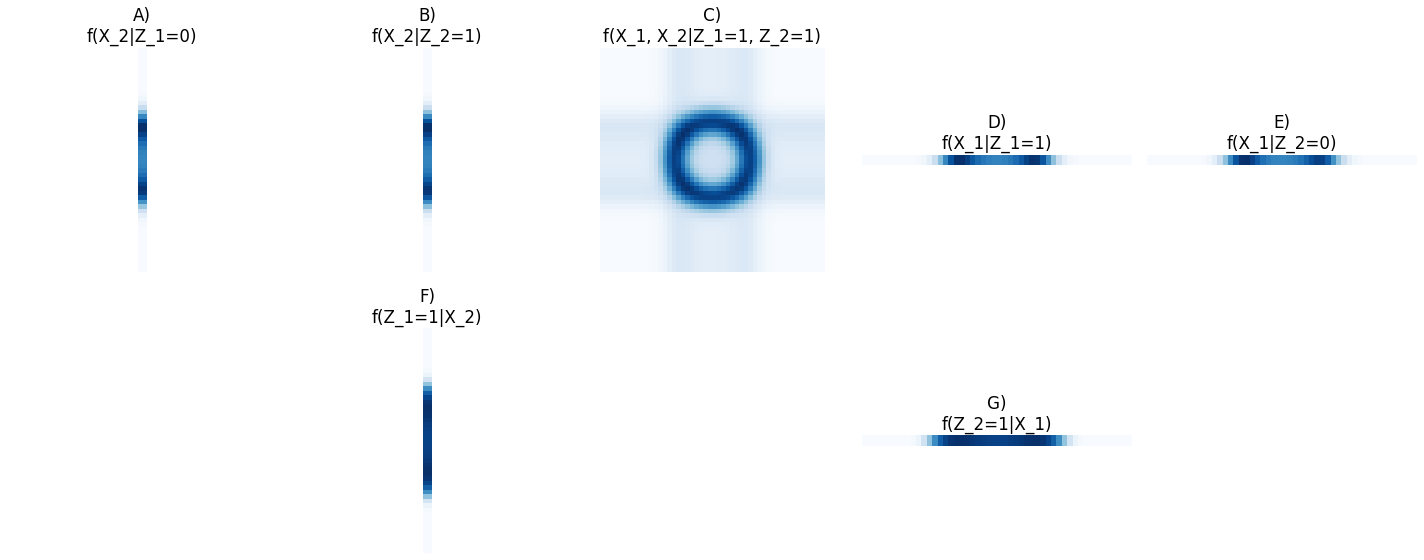

In [215]:
num_samples=100000
ratio_of_missing_values=.2
imbalance_ratio=.5
resolution=50
methods=["side_spaces"]
dataset = 'circles'

h = .2

#################################################################
# (1) Create toy and ground truth data
#################################################################
X, _, Y, _ = create_dataset(name=dataset, 
                                  num_samples=num_samples, 
                                  ratio_of_missing_values=ratio_of_missing_values, #
                                  imbalance_ratio=imbalance_ratio,
                                  provide_labels=True, 
                                  verbose=False)

#################################################################
# (2) Separate between training and test set 
#################################################################

proportion_train  = .8

X_train, X_test = X[:int(proportion_train*X.shape[0])], X[int(proportion_train*X.shape[0]):]
Y_train, Y_test = Y[:int(proportion_train*X.shape[0])], Y[int(proportion_train*X.shape[0]):]

X_train_pos, X_train_neg = X_train[Y_train==1], X_train[Y_train==0]

#################################################################
# (3) Estimation of the different distributions
#################################################################

hat_f_pos, hat_f_1_pos, hat_f_2_pos, hat_f_z1_knowing_x2_pos, hat_f_z2_knowing_x1_pos, hat_f_2_marginal_pos, hat_f_1_marginal_pos = kernel_based_pdf_estimation_xz(X=X_train_pos, h=h, resolution=resolution, cmap='Blues', verbose=1)
hat_f_neg, hat_f_1_neg, hat_f_2_neg, hat_f_z1_knowing_x2_neg, hat_f_z2_knowing_x1_neg, hat_f_2_marginal_neg, hat_f_1_marginal_neg = kernel_based_pdf_estimation_xz(X=X_train_neg, h=h, resolution=resolution, cmap='Greens',verbose=1)



Sanity check: num prediction: 200 == 200: Num samples

Sample: 99 positive and 101 negative samples (#p/#n= 98%)
Accuracy: 96.5%
F1 score (2 PPVxTPR/(PPV+TPR)): 96.6%
Matthews correlation coefficient (MCC): 93.2%
Sensitivity, recall, hit rate, or true positive rate (TPR): 100.0%
Specificity, selectivity or true negative rate (TNR): 93.1%
Precision or positive predictive value (PPV): 93.4%
Negative predictive value (NPV): 100.0%
Miss rate or false negative rate (FNR): 0.0%
False discovery rate (FDR=1-PPV): 6.6%
False omission rate (FOR=1-NPV): 0.0%


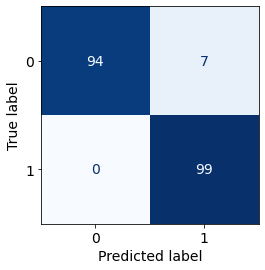

In [204]:
#################################################################
# (4) Prediction using maximum likelihood estimation
#################################################################

_, step = np.linspace(-2.5,2.5,resolution, retstep=True)

# Contains for each sample of the Test set, the corresponding x and y index coordinates, in the matrix of the 2D pdf... 
coord_to_index = np.floor_divide(X_test+2.5, step)


# Init. the array of prediction
predictions = np.zeros(shape=Y_test.shape[0]); arr = []



#----------- Treat the case of when both coordinates are known


# Index of the samples in the test set where both first coordinates are known 
X_indexes_both_known = np.argwhere((~np.isnan(coord_to_index)).sum(axis=1)==2).squeeze(); arr.extend(X_indexes_both_known)

# Coordinates of indexes in the feature space of the samples in the test set where both first coordinates are known 
hat_f_coordinates = coord_to_index[X_indexes_both_known].astype(int)
inds_array = np.moveaxis(np.array(list(map(tuple, hat_f_coordinates))), -1, 0)

# Compare likelihood to do the prediction
predictions_both_known = (hat_f_pos[tuple(inds_array)] > hat_f_neg[tuple(inds_array)]).astype(int)

# Assign predictions 
predictions[X_indexes_both_known] = predictions_both_known

#----------- Treat the case of when only the first coordinate is known

# Index of the samples in the test set where only the first coordinate is known 
X_indexes_first_known = np.argwhere(~np.isnan(coord_to_index[:,0]) & np.isnan(coord_to_index[:,1])).squeeze(); arr.extend(X_indexes_first_known)

# Coordinates of index in the feature space of the samples in the test set where only the first coordinate is known 
hat_f_coordinates = coord_to_index[X_indexes_first_known][:,0].astype(int)

# Compare likelihood to do the prediction
predictions_first_known = (hat_f_1_pos[hat_f_coordinates] > hat_f_1_neg[hat_f_coordinates]).astype(int)

# Assign predictions 
predictions[X_indexes_first_known] = predictions_first_known


#----------- Treat the case of when only the second coordinate is known


# Index of the samples in the test set where only the first coordinate is known 
X_indexes_second_known = np.argwhere(np.isnan(coord_to_index[:,0]) & ~np.isnan(coord_to_index[:,1])).squeeze(); arr.extend(X_indexes_second_known)

# Coordinates of index in the feature space of the samples in the test set where only the first coordinate is known 
hat_f_coordinates = coord_to_index[X_indexes_second_known][:,1].astype(int)

# Compare likelihood to do the prediction
predictions_second_known = (hat_f_2_pos[hat_f_coordinates] > hat_f_2_neg[hat_f_coordinates]).astype(int)

# Assign predictions 
predictions[X_indexes_second_known] = predictions_second_known

print("Sanity check: num prediction: {} == {}: Num samples\n".format(len(arr), Y_test.shape[0]))

# Creation of a df for the results

df = pd.DataFrame({'X1':X_test[:,0], 
                  'X2':X_test[:,1], 
                  'Z1':[1 if not np.isnan(x) else 0 for x in X_test[:,0]],
                  'Z2': [1 if not np.isnan(x) else 0 for x in X_test[:,1]],
                  'Y': Y_test, 
                  'Prediction': predictions, 
                  'True Positive': [1 if y_true==1 and y_pred==1 else 0 for (y_true, y_pred) in zip(Y_test, predictions)], 
                  'True Negative': [1 if y_true==0 and y_pred==0 else 0 for (y_true, y_pred) in zip(Y_test, predictions)], 
                  'False Positive': [1 if y_true==0 and y_pred==1 else 0 for (y_true, y_pred) in zip(Y_test, predictions)], 
                  'False Negative': [1 if y_true==1 and y_pred==0 else 0 for (y_true, y_pred) in zip(Y_test, predictions)], 
                  })
my_classification_report(Y_test, predictions)

In [211]:
fig, axes = plt.subplots(2, 5, figsize=(20, 8));axes = axes.flatten()

axes[0].imshow(hat_f_2_pos[:,None].repeat(2, axis=1), cmap='Blues', extent=[-.5, .5, -2.5, 2.5]);axes[0].set_title("A)\nf(X_2|Z_1=0)")
axes[1].imshow(hat_f_2_marginal_pos[:,None].repeat(2, axis=1), cmap='Blues', extent=[-.5, .5, -2.5, 2.5]);axes[1].set_title("B)\nf(X_2|Z_2=1)")
axes[2].imshow(hat_f_pos, cmap='Blues', extent=[-2.5, 2.5, -2.5, 2.5]);axes[2].set_title("C)\nf(X_1, X_2|Z_1=1, Z_2=1)")
axes[3].imshow(hat_f_1_marginal_pos[None, :].repeat(2, axis=0), cmap='Blues', extent=[-2.5, 2.5, -.5, .5]);axes[3].set_title("D)\nf(X_1|Z_1=1)")
axes[4].imshow(hat_f_1_pos[None, :].repeat(2, axis=0), cmap='Blues', extent=[-2.5, 2.5, -.5, .5]);axes[4].set_title("E)\nf(X_1|Z_2=0)")
#axes[5].imshow(hat_f_z1_knowing_x2[:,None].repeat(2, axis=1));axes[5].set_title("f(Z_1=0|X_2)")
axes[6].imshow(hat_f_z1_knowing_x2_pos[:,None].repeat(2, axis=1), cmap='Blues', extent=[ -.5, .5,-2.5, 2.5]);axes[6].set_title("F)\nf(Z_1=1|X_2)")
axes[8].imshow(hat_f_z2_knowing_x1_pos[None, :].repeat(2, axis=0), cmap='Blues', extent=[-2.5, 2.5, -.5, .5]);axes[8].set_title("G)\nf(Z_2=1|X_1)")
#axes[9].imshow(hat_f_z2_knowing_x1[None, :].repeat(2, axis=0));axes[9].set_title("f(Z_2=0|X_1)")


# plot on the A) plot the sample having only X2 
axes[0].scatter([0]*len(df.query(" `Z1`==0 and  `Z2`==1 and `True Positive`==1")), 
                df.query(" `Z1`==0 and  `Z2`==1 and `True Positive`==1")['X2'], 
                color='b', label="TP (n={})".format(len(df.query(" `Z1`==0 and  `Z2`==1 and `True Positive`==1"))))
axes[0].scatter([0]*len(df.query(" `Z1`==0 and  `Z2`==1 and `False Positive`==1")), 
                df.query(" `Z1`==0 and  `Z2`==1 and `False Positive`==1")['X2'], 
            color='g', label="FP (n={})".format(len(df.query(" `Z1`==0 and  `Z2`==1 and `False Positive`==1"))))
axes[0].scatter([0]*len(df.query(" `Z1`==0 and  `Z2`==1 and `False Negative`==1")),  
                df.query(" `Z1`==0 and  `Z2`==1 and `False Negative`==1")['X2'], 
                color='r', label="FN (n={})".format(len(df.query(" `Z1`==0 and  `Z2`==1 and `False Negative`==1"))))


axes[2].scatter(df.query(" `Z1`==1 and  `Z2`==1 and `True Positive`==1")['X1'], 
                df.query(" `Z1`==1 and  `Z2`==1 and `True Positive`==1")['X2'], 
                color='b', label="TP (n={})".format(len(df.query(" `Z1`==1 and  `Z2`==1 and `True Positive`==1"))))
axes[2].scatter(df.query(" `Z1`==1 and  `Z2`==1 and `False Positive`==1")['X1'], 
                df.query(" `Z1`==1 and  `Z2`==1 and `False Positive`==1")['X2'], 
               color='g', label="FP (n={})".format(len(df.query(" `Z1`==1 and  `Z2`==1 and `False Positive`==1"))))
axes[2].scatter(df.query(" `Z1`==1 and  `Z2`==1 and `False Negative`==1")['X1'],  
                df.query(" `Z1`==1 and  `Z2`==1 and `False Negative`==1")['X2'], 
                color='r', label="FN (n={})".format(len(df.query(" `Z1`==1 and  `Z2`==1 and `False Negative`==1"))))

axes[4].scatter(df.query(" `Z1`==1 and  `Z2`==0 and `True Positive`==1")['X1'],
                [0]*len(df.query(" `Z1`==1 and  `Z2`==0 and `True Positive`==1")),  
                color='b', label="TP (n={})".format(len(df.query(" `Z1`==1 and  `Z2`==0 and `True Positive`==1"))))
axes[4].scatter(df.query(" `Z1`==1 and  `Z2`==0 and `False Positive`==1")['X1'], 
                [0]*len(df.query(" `Z1`==1 and  `Z2`==0 and `False Positive`==1")),
                color='g', label="FP (n={})".format(len(df.query(" `Z1`==1 and  `Z2`==0 and `False Positive`==1"))))
axes[4].scatter(df.query(" `Z1`==1 and  `Z2`==0 and `False Negative`==1")['X1'], 
                [0]*len(df.query(" `Z1`==1 and  `Z2`==0 and `False Negative`==1")),  
                color='r', label="FN (n={})".format(len(df.query(" `Z1`==1 and  `Z2`==0 and `False Negative`==1"))))

_ = [ax.legend(prop={'size':10}, loc='lower right') for i,ax in enumerate(axes) if i in [0, 2, 4]]; [ax.axis('off') for ax in axes]; plt.tight_layout()


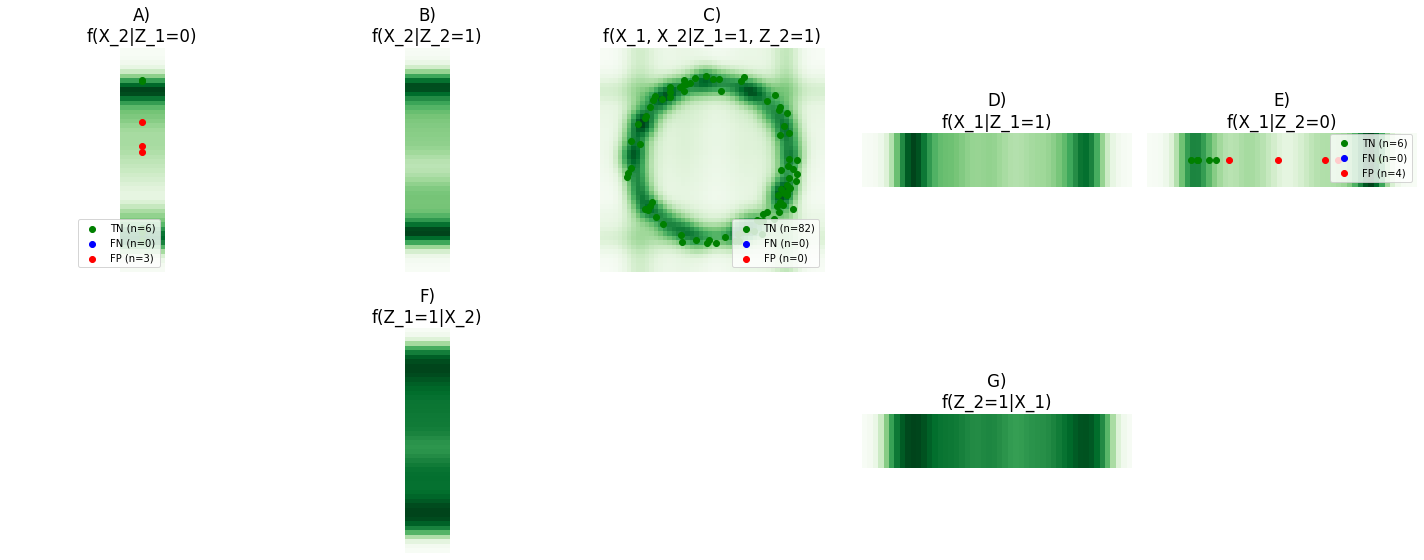

In [212]:
fig, axes = plt.subplots(2, 5, figsize=(20, 8));axes = axes.flatten()

axes[0].imshow(hat_f_2_neg[:,None].repeat(2, axis=1), cmap='Greens', extent=[-.5, .5, -2.5, 2.5]);axes[0].set_title("A)\nf(X_2|Z_1=0)")
axes[1].imshow(hat_f_2_marginal_neg[:,None].repeat(2, axis=1), cmap='Greens', extent=[-.5, .5, -2.5, 2.5]);axes[1].set_title("B)\nf(X_2|Z_2=1)")
axes[2].imshow(hat_f_neg, cmap='Greens', extent=[-2.5, 2.5, -2.5, 2.5]);axes[2].set_title("C)\nf(X_1, X_2|Z_1=1, Z_2=1)")
axes[3].imshow(hat_f_1_marginal_neg[None, :].repeat(2, axis=0), cmap='Greens', extent=[-2.5, 2.5, -.5, .5]);axes[3].set_title("D)\nf(X_1|Z_1=1)")
axes[4].imshow(hat_f_1_neg[None, :].repeat(2, axis=0), cmap='Greens', extent=[-2.5, 2.5, -.5, .5]);axes[4].set_title("E)\nf(X_1|Z_2=0)")
#axes[5].imshow(hat_f_z1_knowing_x2[:,None].repeat(2, axis=1));axes[5].set_title("f(Z_1=0|X_2)")
axes[6].imshow(hat_f_z1_knowing_x2_neg[:,None].repeat(2, axis=1), cmap='Greens', extent=[ -.5, .5,-2.5, 2.5]);axes[6].set_title("F)\nf(Z_1=1|X_2)")
axes[8].imshow(hat_f_z2_knowing_x1_neg[None, :].repeat(2, axis=0), cmap='Greens', extent=[-2.5, 2.5, -.5, .5]);axes[8].set_title("G)\nf(Z_2=1|X_1)")
#axes[9].imshow(hat_f_z2_knowing_x1[None, :].repeat(2, axis=0));axes[9].set_title("f(Z_2=0|X_1)")


# plot on the A) plot the sample having only X2 
axes[0].scatter([0]*len(df.query(" `Z1`==0 and  `Z2`==1 and `True Negative`==1")), 
                df.query(" `Z1`==0 and  `Z2`==1 and `True Negative`==1")['X2'], 
                color='g', label="TN (n={})".format(len(df.query(" `Z1`==0 and  `Z2`==1 and `True Negative`==1"))))
axes[0].scatter([0]*len(df.query(" `Z1`==0 and  `Z2`==1 and `False Negative`==1")), 
                df.query(" `Z1`==0 and  `Z2`==1 and `False Negative`==1")['X2'], 
            color='b', label="FN (n={})".format(len(df.query(" `Z1`==0 and  `Z2`==1 and `False Negative`==1"))))
axes[0].scatter([0]*len(df.query(" `Z1`==0 and  `Z2`==1 and `False Positive`==1")),  
                df.query(" `Z1`==0 and  `Z2`==1 and `False Positive`==1")['X2'], 
                color='r', label="FP (n={})".format(len(df.query(" `Z1`==0 and  `Z2`==1 and `False Positive`==1"))))


axes[2].scatter(df.query(" `Z1`==1 and  `Z2`==1 and `True Negative`==1")['X1'], 
                df.query(" `Z1`==1 and  `Z2`==1 and `True Negative`==1")['X2'], 
                color='g', label="TN (n={})".format(len(df.query(" `Z1`==1 and  `Z2`==1 and `True Negative`==1"))))
axes[2].scatter(df.query(" `Z1`==1 and  `Z2`==1 and `False Negative`==1")['X1'], 
                df.query(" `Z1`==1 and  `Z2`==1 and `False Negative`==1")['X2'], 
               color='b', label="FN (n={})".format(len(df.query(" `Z1`==1 and  `Z2`==1 and `False Negative`==1"))))
axes[2].scatter(df.query(" `Z1`==1 and  `Z2`==1 and `False Positive`==1")['X1'],  
                df.query(" `Z1`==1 and  `Z2`==1 and `False Positive`==1")['X2'], 
                color='r', label="FP (n={})".format(len(df.query(" `Z1`==1 and  `Z2`==1 and `False Positive`==1"))))

axes[4].scatter(df.query(" `Z1`==1 and  `Z2`==0 and `True Negative`==1")['X1'],
                [0]*len(df.query(" `Z1`==1 and  `Z2`==0 and `True Negative`==1")),  
                color='g', label="TN (n={})".format(len(df.query(" `Z1`==1 and  `Z2`==0 and `True Negative`==1"))))
axes[4].scatter(df.query(" `Z1`==1 and  `Z2`==0 and `False Negative`==1")['X1'], 
                [0]*len(df.query(" `Z1`==1 and  `Z2`==0 and `False Negative`==1")),
                color='b', label="FN (n={})".format(len(df.query(" `Z1`==1 and  `Z2`==0 and `False Negative`==1"))))
axes[4].scatter(df.query(" `Z1`==1 and  `Z2`==0 and `False Positive`==1")['X1'], 
                [0]*len(df.query(" `Z1`==1 and  `Z2`==0 and `False Positive`==1")),  
                color='r', label="FP (n={})".format(len(df.query(" `Z1`==1 and  `Z2`==0 and `False Positive`==1"))))

_ = [ax.legend(prop={'size':10}, loc='lower right') for i,ax in enumerate(axes) if i in [0, 2, 4]]; [ax.axis('off') for ax in axes]; plt.tight_layout()


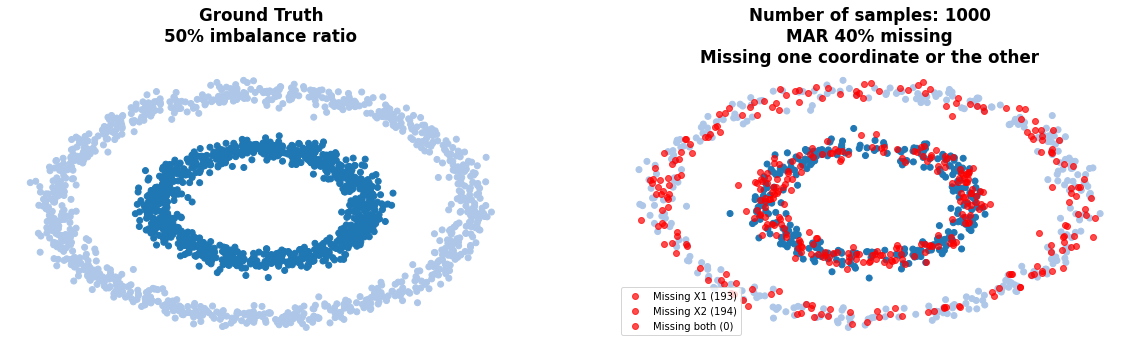

Sanity check: num prediction: 200 == 200: Num samples

Sample: 100 positive and 100 negative samples (#p/#n=100%)
Accuracy: 88.5%
F1 score (2 PPVxTPR/(PPV+TPR)): 89.4%
Matthews correlation coefficient (MCC): 78.1%
Sensitivity, recall, hit rate, or true positive rate (TPR): 97.0%
Specificity, selectivity or true negative rate (TNR): 80.0%
Precision or positive predictive value (PPV): 82.9%
Negative predictive value (NPV): 96.4%
Miss rate or false negative rate (FNR): 3.0%
False discovery rate (FDR=1-PPV): 17.1%
False omission rate (FOR=1-NPV): 3.6%


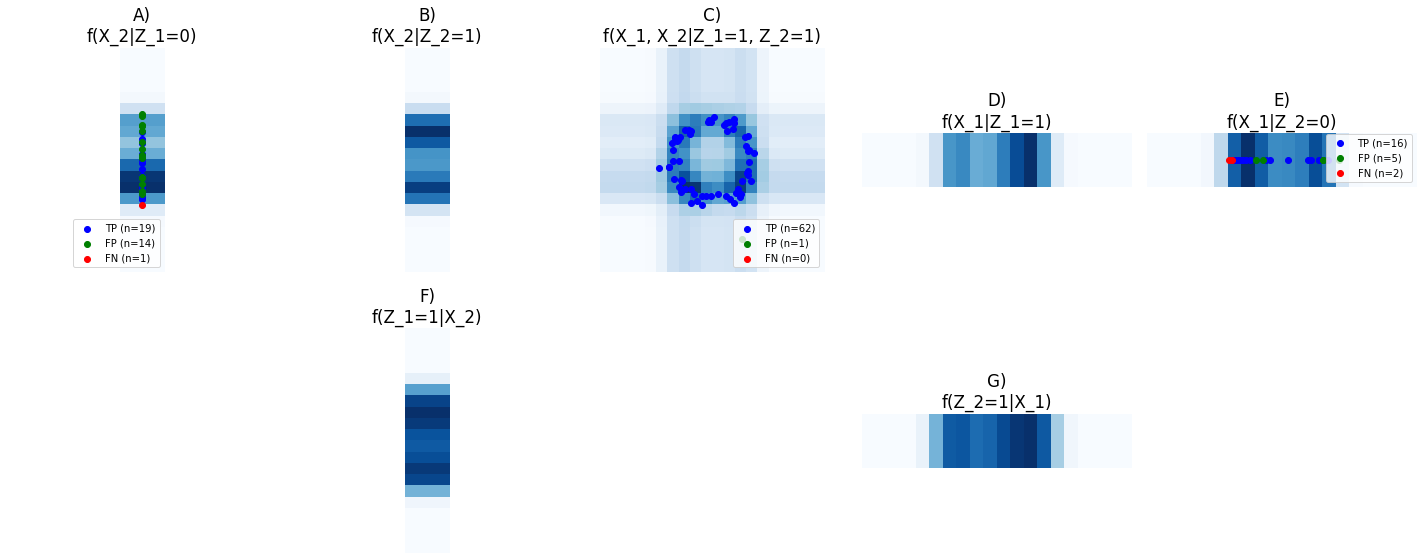

In [115]:
num_samples=1000
ratio_of_missing_values=.4
imbalance_ratio=.5
proportion_train  = .8

resolution=20

methods="side_spaces"
dataset = 'circles'
bandwidth = .2
# NOTES: - might want to do a fit and predict and use sklearn base classes

#################################################################
# (1) Create toy and ground truth data
#################################################################

dataset = DatasetGenerator(name='circles', num_samples=num_samples, ratio_of_missing_values=ratio_of_missing_values, imbalance_ratio=imbalance_ratio, num_samples_gt=2000, verbosity=1, random_state=47)
dataset.generate_missing_coordinates(missingness_mechanism='MAR', allow_missing_both_coordinates=True, missing_first_quarter=False, ratio_missing_per_class=[.1, .2], verbosity=1)
X, _, y, _ = dataset.get_data()

#################################################################
# (2) Separate between training and test set
# (3) Estimation of the different distributions
# (4) Prediction using maximum likelihood estimation
#################################################################

from stats import fit_predict
X_test, y_true, y_pred = fit_predict(X, y, proportion_train, resolution, bandwidth=bandwidth)

#################################################################
# (5) Mesure of the performances
#################################################################

from utils import performance
df = performance(X_test, y_true, y_pred)

In [ ]:
from operator import le
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import euclidean_distances
import matplotlib.pyplot as plt
import os
import plotly.express as px

class model(BaseEstimator, ClassifierMixin):
    """Wrap sklearn models into my own estimator, this allows my to handle some upsampling and custom operations in a more compact fashion. 
    """
    def __init__(self, method, name='ClassifierName', **kwargs):
        
        self.name = name
        self.force_all_finite = True
        self.sampling_method = 'smote'

        # Depending on the method selected, init the proper sklearn model
        if method == "knn":  # use k-nearest neighbor
            from sklearn.neighbors import KNeighborsClassifier
            self.model =  KNeighborsClassifier(n_neighbors=40, weights='uniform', **kwargs)

        if method == "lg":  # use logistic regresion
            from sklearn.linear_model import LogisticRegression
            self.model = LogisticRegression(**kwargs)

        if method == 'nb': 
            from sklearn.naive_bayes import GaussianNB
            self.model = GaussianNB(**kwargs)
            
        if method == 'xgboost':
            from xgboost import XGBClassifier
            self.model = XGBClassifier(use_label_encoder=False,
                                      learning_rate=0.01,
                                      verbosity=1,
                                      objective='binary:logistic',
                                      eval_metric='auc',
                                      booster='gbtree',
                                      tree_method='exact',
                                      subsample=1,
                                      colsample_bylevel=.8,
                                      alpha=0, 
                                      **kwargs)
            self.force_all_finite = False
            self.sampling_method = 'vanilla'

    def fit(self, X, y, balanced=True, **kwargs):
        """
        Train the model using X (n_samples, n_features) matrix, for the two classes
        problem. To work with imbalanced probels, balanced=True can be set, which 
        oversamples the minority class (assumed to be the positive class y=1), to 
        much the number of samples in the majority class (assumed to be the negative
        class, i.e., y=0). You can set "model_id" parameters to set where tensorboard
        logs are saved, which is useful to visualize training. 
        """

        if self.force_all_finite:
            X_filled = X.copy()
            X_filled[np.isnan(X_filled)] = -1
        else:
            X_filled = X


        
        # Check that X and y have correct shape
        X, y = check_X_y(X_filled, y, force_all_finite=self.force_all_finite)
        # Store the classes seen during fit
        self.classes_ = unique_labels(y)

        """
        Normalize the data and store the normalization parameters. 
        """
        from sklearn import preprocessing
        self.scaler = preprocessing.StandardScaler()
        self.scaler.fit(X_filled)  # fit scaler
        X_filled = self.scaler.transform(X_filled) # normalize the training data. 

        """
        Oversample the minority class
        """
        if balanced:
            X_filled,y = upsample_minority(X_filled,y,method=self.sampling_method)
        #ratio_train = float(np.sum(y == 0)) / np.sum(y==1)
        #print("Ratio after upsampling minority class: {}".format(ratio_train))

        """
        Fit
        """
        self.model.fit(X_filled, y, **kwargs)        
        return self
    
    def predict_proba(self, X):
        # Predict the classification score (associated with the class==1)
        X = self.scaler.transform(X)  # normalized input

        # Fill the values with -1 in case of algorithm not robust to missing data
        if self.force_all_finite:
            X_filled = X.copy()
            X_filled[np.isnan(X_filled)] = -1
        else:
            X_filled = X
        y_score = self.model.predict_proba(X_filled)[:,1]  
        return y_score
    
    def predict(self, X, th=.5):
        # Check is fit had been called
        check_is_fitted(self)
        # Input validation
        X = check_array(X)
        # Normalize the sample to match the pre-processing done at training        
        y_score = self.predict_proba(X)  # predict 
        y_pred = [1 if yy>=th else 0 for yy in y_score]
        return y_pred

In [ ]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", hue="species", kind="kde")

In [ ]:
sns.jointplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="species",
    kind="kde"
)


**Conclusion on the method:**
    
    1) TODO

#### Functions

In [200]:
def my_classification_report(y_true, y_pred):
    """
    Print several performance metrics that are common in the context of screening and fraud detection.
    """    

    """
    First compute the TP, FP, TN and FN from which most metrics derive
    """
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    """
    Compute metrics of interest  
    """    
    print('Sample: {} positive and {} negative samples (#p/#n={:3.0f}%)'.format(tp+fn, tn+fp, 100*(tp+fn)/(tn+fp)))
    acc = (tp + tn) / (tp + tn + fp +  fn)
    print('Accuracy: {:3.1f}%'.format(100*acc))
    f1 = 2*tp / (2*tp + fp + fn)
    print('F1 score (2 PPVxTPR/(PPV+TPR)): {:3.1f}%'.format(100*f1))
    mcc = (tp*tn - fp*fn) / np.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
    print('Matthews correlation coefficient (MCC): {:3.1f}%'.format(100*mcc))
    tpr =  tp / (tp+fn)
    print('Sensitivity, recall, hit rate, or true positive rate (TPR): {:3.1f}%'.format(100*tpr))
    tnr = tn / (tn+fp)
    print('Specificity, selectivity or true negative rate (TNR): {:3.1f}%'.format(100*tnr))
    ppv = tp / (tp+fp)
    print('Precision or positive predictive value (PPV): {:3.1f}%'.format(100*ppv))
    npv = tn / (tn+fn)
    print('Negative predictive value (NPV): {:3.1f}%'.format(100*npv))
    fnr = fn / (tp+fn)
    print('Miss rate or false negative rate (FNR): {:3.1f}%'.format(100*fnr))
    print('False discovery rate (FDR=1-PPV): {:3.1f}%'.format(100*(1-ppv)))
    print('False omission rate (FOR=1-NPV): {:3.1f}%'.format(100*(1-npv)))
    cm = confusion_matrix(Y_test, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    disp.im_.colorbar.remove()
    plt.show()
    return 


## Remaining questions

- How to build a confidece interval for the estimation, potentially using the missing data ? (The more data the higher the confidence) 
- How to be able to characterize easily the missingness mechanism at stake ? 

In [158]:
kernel_bandwidth=.2
num_samples=1000
ratio_of_missing_values=.5
imbalance_ratio=.5
resolution=50
dataset = 'moon'
from utils import estimate_pdf
methods=["side_spaces"]
dataset = 'circles'



h = kernel_bandwidth

# (1) Create toy and ground truth data
X, Xgt, _, _ = create_dataset(name=dataset, 
                                  num_samples=num_samples, 
                                  ratio_of_missing_values=ratio_of_missing_values, #
                                  imbalance_ratio=imbalance_ratio,
                                  provide_labels=True, 
                                  verbose=True)
resolution=20
bandwidth=.2

xygrid = np.meshgrid(np.linspace(-2.5,2.5,resolution),np.linspace(-2.5,2.5,resolution))
H,W = xygrid[0].shape
hat_f_z = np.zeros_like(xygrid[0])  # init. the pdf estimation
hat_f_z_1 = np.zeros((xygrid[0].shape[0], 1))  # init. the pdf estimation
hat_f_z_2 = np.zeros((1, xygrid[0].shape[0]))  # init. the pdf estimation

print("hat_f_z is of dimention {}".format(hat_f_z.shape))
print("hat_f_z_1 is of dimention {}".format(hat_f_z_1.shape))
print("hat_f_z_2 is of dimention {}".format(hat_f_z_2.shape))

for i in range(H):
    for j in range(W):
        x = xygrid[0][i,j]
        y = xygrid[1][i,j]
        hat_f_z[i,j], hat_f_z_1[i,j], hat_f_z_2[i,j] =  kernel_based_pdf_estimation_side_spaces_z(X=X, x=[x,y], h=h)

# Average the contribution of all j's coordinate on this horizontal line
hat_f_z_1 = np.mean(hat_f_z_1, axis=0)

# Average the contribution of all i's coordinate to form the vertical line
hat_f_2 = np.mean(hat_f_z_2, axis=1)   



hat_f_z is of dimention (20, 20)
hat_f_z_1 is of dimention (20, 1)
hat_f_z_2 is of dimention (1, 20)


NameError: name 'data' is not defined

# Suite

- https://github.com/ResidentMario/missingno 


### What if the prediction sample has missing values?

We focus previously on dealing with missing values on the data available to estimate the pdf ($X_i$). Sometimes, we want to estimate the probability of an observed sample with values $u$, but some of the coordinates could be missing. Think for example, that you have the PDF to estimate the probability of the salary of a person based on their educations, years of experience, and age; but for some reason, the age is missing. 

As in {eq}`eq:kernel_estimation_mdim2` we use the $j$ subindex to denote the coordinate, $u=\{u_j\}$ with $j=1,...,k$ (as before, we are working on a $k$-dimensional feature space). Let us define the set $N = [j_1, ..., j_p]$ the set of coordinates for which $u$ is known. When we know all the coordinates, we are essentially estimating the density distribution associated with a point in the k-dimensional feature space. If we don't know one axis, we can think as estimating the density along a line (associated to all the point that share the known axis). If we don't know two coordinates we are estimating the density associated with a 2D plane and so on. In general, the density associated with the hyperplane of unknown coordinates can be estimated as:

$$
\hat{f}_N(u) = \int_{u_j j\notin N} \hat{f}(u) =  \int_{u_j j\notin N} \frac 1 n \sum_i \prod_j f_{ij}(u).
$$(eq:kernel_estimation_missing_values)

Using the definition $f_{ij}(u)$ introduces in {eq}`eq:fij_unknown_j`, and standard properties of calculus, we have, 
 
$$
\hat{f}_N(u) = \int_{u_j j\notin N} \frac 1 n \sum_i \prod_j f_{ij}(u) = \frac 1 n \sum_i \prod_{j \in N} f_{ij}(u) \prod_{j \notin N} \int_{-\infty}^{+\infty} \frac{1}{h\sqrt{2\pi}} e^{-\frac{1}{2 h^2} (u_j-X_{ij})^2} du_{j} = \frac 1 n \sum_i \prod_{j \in N} f_{ij}(u). $$(eq:kernel_estimation_missing_values2)

Equation {eq}`eq:kernel_estimation_missing_values2` proves that restricting the prediction to a subset of features, is as simple as computing the pdf restricting the training data to only those known features. As we show, the mathetical interpretation is that we will be estimating the density in a hyperplance of the feature space rather than a single point. 

# Estimation of Q

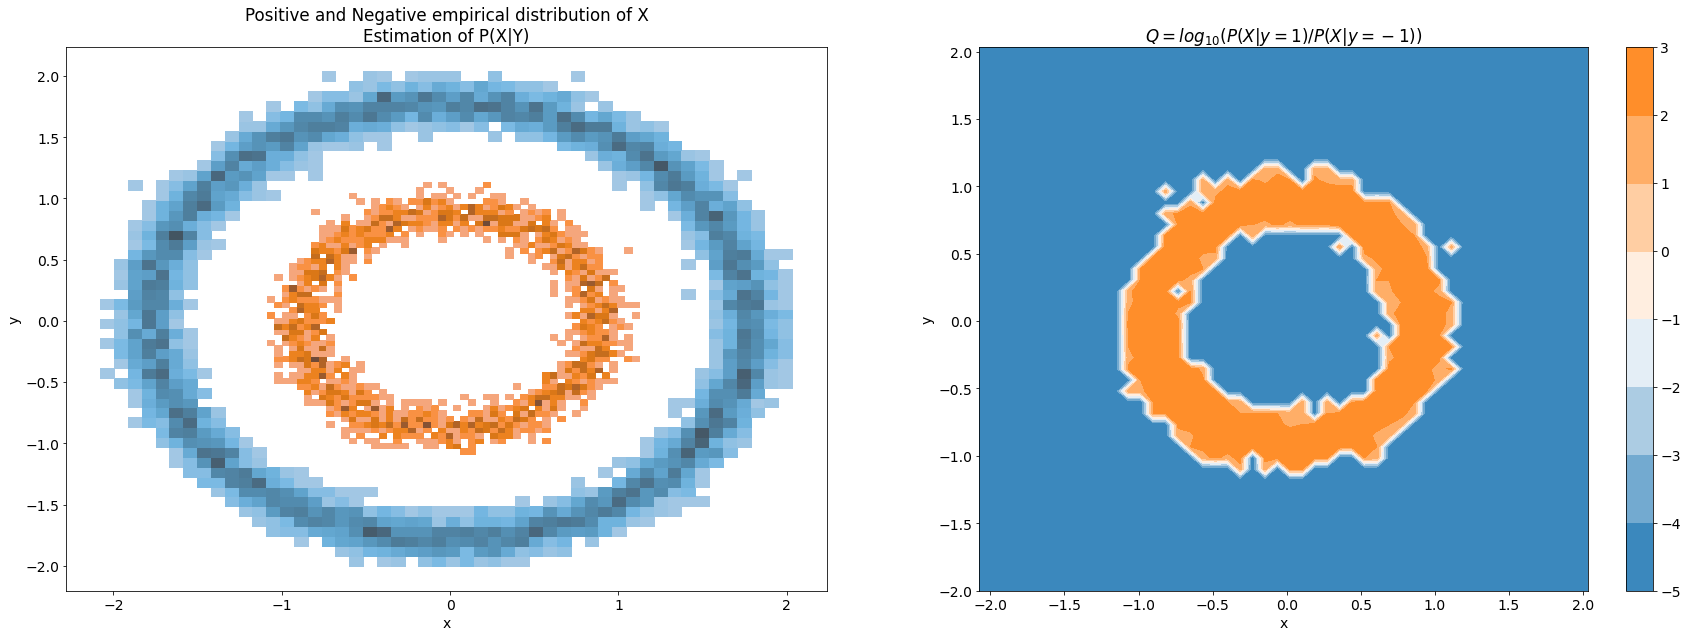

In [4]:
from stats import feature_values_positive_to_negative_ratio
X, Xgt, Y, Ygt = create_dataset(name="circles", 
                                          num_samples=10000, 
                                          ratio_of_missing_values=0,#ratio_of_missing_values, 
                                          imbalance_ratio=imbalance_ratio,
                                          provide_labels=True, 
                                          verbose=False)
Xp = X[np.argwhere(Y==1).squeeze()]; Xn = X[np.argwhere(Y==0).squeeze()]
Q = feature_values_positive_to_negative_ratio(Xp=Xp, Xn=Xn, num_bins=50)

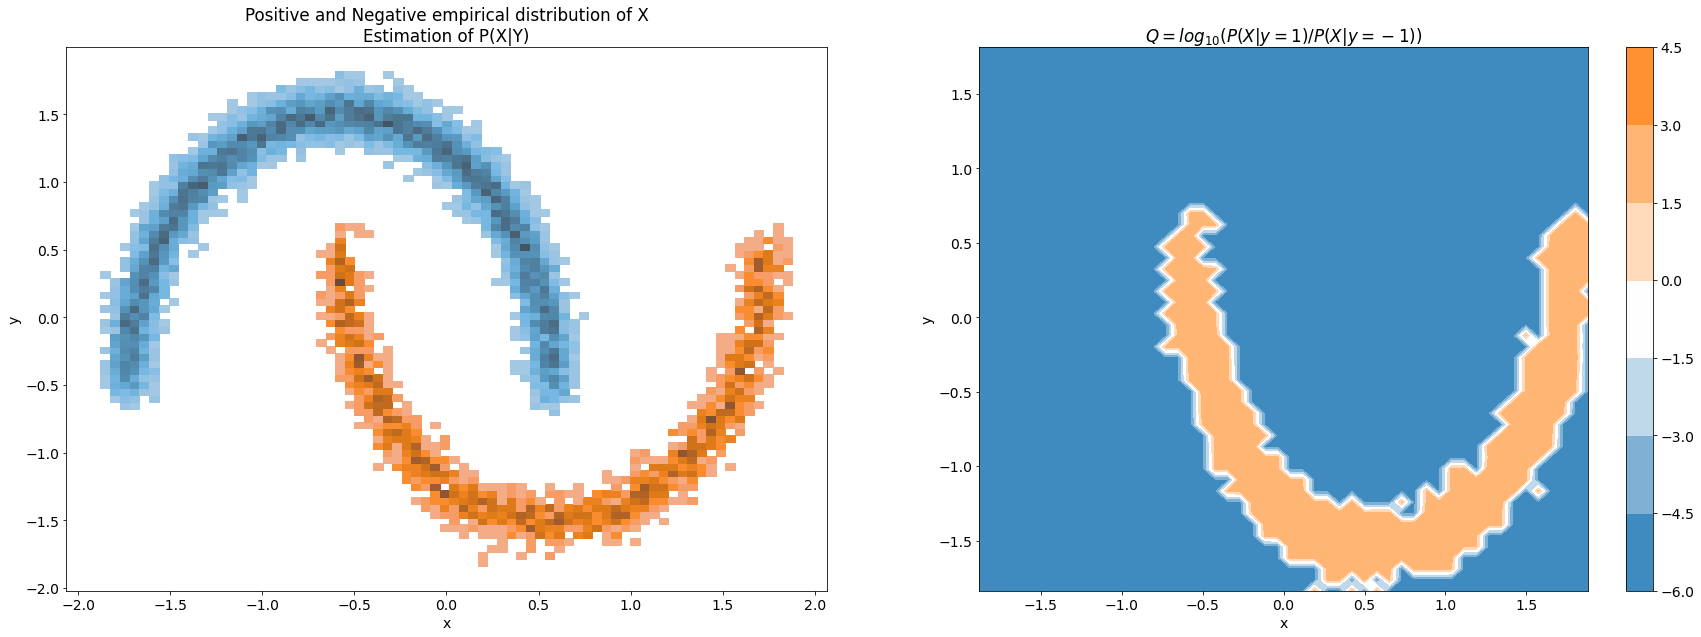

In [5]:
from stats import feature_values_positive_to_negative_ratio
X, Xgt, Y, Ygt = create_dataset(name="moons", 
                                          num_samples=10000, 
                                          ratio_of_missing_values=0, 
                                          imbalance_ratio=imbalance_ratio,
                                          provide_labels=True, 
                                          verbose=False)
Xp = X[np.argwhere(Y==1).squeeze()]; Xn = X[np.argwhere(Y==0).squeeze()]
Q = feature_values_positive_to_negative_ratio(Xp=Xp, Xn=Xn, num_bins=50)